In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from nilearn.plotting import plot_prob_atlas
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show
from baseline.utils import evaluate_iou

from utils.activate import FBNActivate, STAIndividual
from utils.metric import IoU
from utils.thresholding import thresholding, flip

import torch
from torch.utils import data
from nilearn.input_data import NiftiMasker
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
from copy import deepcopy

from utils.transform import inverse_transform
from torch.optim import Adam, SGD
import torch.nn as nn
from model.architecture import STCAE
from model.architecture import STCA


In [2]:
sta = STAIndividual(img_path="/home/liuyiheng/data/HCP_rest/sub1.npy",
                    model_path="./model_save_dir/hcp_rest_sub1.pth")

In [3]:
sta.load_img()
# sta.fit(epochs=1)

In [4]:
template = np.load("../SAAE/ICA_templete_10.npy")
template = thresholding(template)

In [5]:
sta.eval()

In [6]:
%%time
iou_max = []
for i in range(sta.imgs.shape[1] - sta.time_step):
    img2d = sta.predict(i)
    img2d[np.sum(img2d > 0, axis=1) < np.sum(img2d < 0, axis=1)] *= -1
#     img2d = (img2d - img2d.min(axis=1).reshape(-1, 1)) / (img2d.max(axis=1).reshape(-1, 1) - img2d.min(axis=1).reshape(-1, 1))
    img2d[img2d <3.6 ] = 0
    iou = evaluate_iou(img2d, template)
    iou_max.append(deepcopy(iou.max(axis=0)))
#     print(iou.max(axis=0), iou.argmax(axis=0))


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0005	0.0000	0.0012	0.0347	0.0249	0.0527	0.0455	0.2701	0.0424	0.0661	
Index		5	0	5	60	5	40	19	60	2	40	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0005	0.0000	0.0028	0.0350	0.0337	0.0886	0.0442	0.2714	0.0465	0.0809	
Index		5	0	40	62	50	40	19	26	2	40	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0027	0.0000	0.0052	0.0369	0.0685	0.0737	0.0420	0.2737	0.0355	0.1087	
Index		40	0	40	62	50	40	19	26	2	10	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0052	0.0105	0.0083	0.0389	0.1026	0.0778	0.0398	0.2789	0.0210	0.1182	
Index		40	2	40	62	50	10	19	26	2	10	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0056	0.0325	0.0115	0.0414	0.1202	0.0719	0.0382	0.2869	0.0180	0.1178	
Index		40	2	2	62	50	10	19	26	9	10	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0065	0.0680	0.0267	0.0433	0.1302	0.0630	0.0360	0.2918	0.0173	0.1156	
Index		40	2	2	62	40	10	19	26	9	10	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0082	0.0889	0.0562	0.0434	0.1547	0.0503	0.0334	0.2957	0.0170	0.1031	
Index		40	2	2	62	40	10	19	26	9	10	


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2804	0.0037	0.1181	0.1099	0.1483	0.1176	0.0872	0.2629	0.0101	0.0186	
Index		50	50	50	21	50	56	32	60	60	10	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2579	0.0009	0.0991	0.1183	0.1229	0.1117	0.0865	0.2606	0.0114	0.0196	
Index		50	4	50	21	50	56	32	60	60	10	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2412	0.0031	0.0790	0.1239	0.0997	0.1050	0.0895	0.2608	0.0094	0.0203	
Index		7	55	50	21	50	56	32	40	60	9	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2379	0.0039	0.0604	0.1181	0.0779	0.1027	0.0942	0.2625	0.0106	0.0220	
Index		7	55	50	21	50	2	32	10	10	9	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2241	0.0039	0.0474	0.1068	0.0563	0.0959	0.0930	0.2627	0.0107	0.0245	
Index		7	55	50	41	50	2	32	10	10	9	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1845	0.0025	0.0404	0.1039	0.0426	0.0883	0.0903	0.2633	0.0104	0.0265	
Index		7	55	7	41	50	2	32	10	10	9	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1283	0.0009	0.0342	0.0976	0.0263	0.0773	0.0803	0.2624	0.0111	0.0279	
Index		7	55	7	41	50	2	32	40	2


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1862	0.1727	0.2149	0.0731	0.1417	0.0142	0.1532	0.1133	0.0311	0.0714	
Index		28	24	19	32	30	22	42	57	50	2	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2214	0.1917	0.2038	0.1035	0.1360	0.0669	0.1396	0.1175	0.0172	0.0712	
Index		28	24	19	32	30	40	42	57	50	2	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2617	0.1911	0.2015	0.1399	0.1313	0.1115	0.1233	0.1217	0.0115	0.0716	
Index		28	24	50	32	30	40	21	57	5	2	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2912	0.1648	0.1905	0.1795	0.1179	0.1135	0.0932	0.1247	0.0128	0.0729	
Index		28	24	50	11	30	42	21	57	60	2	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3066	0.1443	0.1657	0.2014	0.1166	0.1477	0.0552	0.1253	0.0088	0.0801	
Index		28	50	50	11	0	42	21	57	32	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2633	0.1162	0.1332	0.1860	0.1264	0.1457	0.0364	0.1235	0.0099	0.0903	
Index		28	50	50	11	50	1	1	57	32	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1764	0.0761	0.1062	0.1673	0.1354	0.1530	0.0345	0.1208	0.0105	0.0927	
Index		28	50	50	11	50	1	


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4826	0.1511	0.1807	0.0613	0.0104	0.0297	0.0613	0.1718	0.0205	0.0812	
Index		36	10	26	33	60	8	31	28	24	38	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5038	0.1541	0.1920	0.0622	0.0137	0.0212	0.0743	0.2027	0.0167	0.0872	
Index		36	10	26	8	60	56	47	28	24	21	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4982	0.1264	0.1962	0.0625	0.0138	0.0451	0.0748	0.2208	0.0131	0.1004	
Index		25	60	26	8	60	56	47	28	26	21	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5030	0.1339	0.1891	0.0630	0.0084	0.0218	0.0649	0.2267	0.0114	0.1071	
Index		25	26	26	8	26	56	47	28	26	21	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4979	0.1436	0.1779	0.0593	0.0075	0.0092	0.0639	0.2260	0.0119	0.1123	
Index		4	26	26	8	19	12	56	40	50	21	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4812	0.1537	0.1591	0.0577	0.0076	0.0120	0.0464	0.2276	0.0130	0.1151	
Index		4	19	19	8	19	50	56	40	28	10	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4499	0.1662	0.1709	0.0554	0.0064	0.0438	0.0439	0.2204	0.0137	0.1217	
Index		4	19	19	8	19	50	2


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3140	0.0686	0.0900	0.0684	0.0360	0.2050	0.0412	0.0285	0.0608	0.0266	
Index		8	56	8	50	50	23	5	19	19	9	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3071	0.0720	0.1028	0.0800	0.0377	0.2178	0.0376	0.0197	0.0548	0.0270	
Index		8	56	8	50	50	23	5	19	19	9	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3021	0.0755	0.1090	0.0906	0.0347	0.2296	0.0300	0.0147	0.0506	0.0237	
Index		8	56	8	50	50	42	5	19	19	9	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2959	0.0802	0.1118	0.0993	0.0342	0.2407	0.0210	0.0119	0.0457	0.0191	
Index		8	11	8	50	50	42	49	19	19	9	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3050	0.1225	0.1159	0.1124	0.0362	0.2390	0.0263	0.0087	0.0415	0.0149	
Index		7	11	8	50	55	42	23	19	19	9	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3357	0.1625	0.1171	0.1302	0.0459	0.2297	0.0364	0.0075	0.0400	0.0092	
Index		7	32	8	50	55	42	23	50	19	9	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3619	0.2322	0.1199	0.0664	0.0469	0.2206	0.0449	0.0700	0.0468	0.0232	
Index		7	32	2	59	55	40	23	50	50	50	




Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.6080	0.2351	0.1997	0.1329	0.1732	0.0030	0.0088	0.0237	0.0118	0.1587	
Index		30	5	5	33	23	50	50	2	59	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5955	0.2348	0.2008	0.1954	0.1725	0.0062	0.0089	0.0282	0.0139	0.1850	
Index		62	5	5	11	40	42	50	50	59	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5897	0.2341	0.2002	0.2250	0.1782	0.0096	0.0110	0.0351	0.0146	0.2101	
Index		62	5	5	11	40	42	50	50	59	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5851	0.2401	0.1978	0.2422	0.1688	0.0119	0.0134	0.0373	0.0152	0.2165	
Index		28	5	5	33	40	42	50	50	59	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5670	0.2421	0.1992	0.2475	0.1462	0.0133	0.0185	0.0332	0.0143	0.2116	
Index		28	5	5	33	40	42	50	50	59	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5590	0.2407	0.2024	0.2483	0.1185	0.0156	0.0294	0.0297	0.0235	0.1928	
Index		8	5	5	3	40	42	50	2	50	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5633	0.2273	0.2068	0.2526	0.0877	0.0203	0.0439	0.0301	0.0355	0.1608	
Index		8	5	5	3	40	60	50	2	50	50	


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0000	0.0000	0.0092	0.0622	0.0674	0.0053	0.1074	0.1395	0.0907	0.0413	
Index		0	0	50	50	21	21	8	60	19	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0020	0.0004	0.0089	0.0906	0.0719	0.0047	0.1021	0.1688	0.0790	0.0467	
Index		50	10	50	50	21	41	8	10	19	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0038	0.0008	0.0089	0.1201	0.0697	0.0042	0.0922	0.1907	0.0568	0.0461	
Index		50	21	50	50	50	32	8	10	19	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0040	0.0011	0.0086	0.1451	0.0679	0.0041	0.1006	0.1976	0.0442	0.0427	
Index		50	42	50	50	50	32	2	10	26	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0034	0.0015	0.0063	0.1595	0.0623	0.0051	0.1107	0.1979	0.0323	0.0361	
Index		50	32	50	50	50	8	2	10	26	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0026	0.0018	0.0044	0.1695	0.0513	0.0077	0.1166	0.1977	0.0227	0.0260	
Index		50	57	50	50	50	8	2	40	2	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0020	0.0017	0.0024	0.1659	0.0364	0.0087	0.1221	0.1920	0.0180	0.0165	
Index		50	52	50	50	11	8	2	4


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5397	0.1667	0.2088	0.0502	0.0393	0.1257	0.0232	0.1173	0.0217	0.0522	
Index		27	11	56	60	58	50	41	19	41	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5513	0.1593	0.2025	0.0522	0.0344	0.1316	0.0208	0.1020	0.0186	0.0471	
Index		27	11	56	31	58	50	41	19	50	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5577	0.1601	0.1947	0.0616	0.0300	0.1365	0.0192	0.0884	0.0211	0.0411	
Index		27	56	56	31	58	50	50	19	50	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5615	0.1533	0.1856	0.0736	0.0248	0.0954	0.0203	0.0984	0.0859	0.0375	
Index		27	56	56	44	58	26	5	60	50	19	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5479	0.1433	0.1684	0.0804	0.0291	0.0946	0.0486	0.1147	0.1118	0.0272	
Index		37	56	56	30	50	5	50	19	50	19	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5395	0.1285	0.1506	0.0919	0.0360	0.0902	0.0587	0.1329	0.1377	0.0253	
Index		14	56	16	35	8	5	50	19	50	60	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5200	0.1125	0.1608	0.1064	0.0420	0.0637	0.0647	0.1385	0.1581	0.0271	
Index		58	56	26	33	8


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5149	0.0937	0.1176	0.0902	0.2462	0.0378	0.0979	0.1891	0.0650	0.0632	
Index		33	32	3	21	26	42	32	50	23	32	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5018	0.0975	0.1083	0.0859	0.2680	0.0333	0.1281	0.1458	0.0715	0.0600	
Index		14	32	3	21	50	42	23	50	23	32	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4952	0.1086	0.0980	0.0661	0.3605	0.0326	0.1482	0.1248	0.0691	0.0522	
Index		14	11	3	60	46	40	23	21	40	32	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4880	0.1225	0.0935	0.0546	0.4291	0.0263	0.1581	0.0861	0.0806	0.0549	
Index		14	11	50	60	50	40	22	21	40	42	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4829	0.1326	0.1121	0.0433	0.4055	0.0242	0.1880	0.0388	0.0783	0.0765	
Index		14	11	50	10	50	21	17	21	40	17	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4672	0.1356	0.1201	0.0342	0.3448	0.0273	0.2001	0.0304	0.0750	0.0960	
Index		14	11	46	10	42	21	17	40	60	17	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4583	0.1526	0.1377	0.0237	0.3525	0.0268	0.1964	0.0366	0.0745	0.1110	
Index		4	41	55	30	4


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5777	0.1548	0.2292	0.1169	0.1455	0.0630	0.0407	0.1217	0.0285	0.0495	
Index		20	5	5	47	45	2	50	7	50	7	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5772	0.1496	0.2265	0.1220	0.1579	0.0513	0.0441	0.1198	0.0309	0.0528	
Index		20	5	5	47	50	2	50	7	50	7	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5705	0.1476	0.2221	0.1345	0.1775	0.0424	0.0441	0.1092	0.0329	0.0547	
Index		20	5	5	6	50	26	50	7	50	7	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5474	0.1474	0.2149	0.1384	0.1905	0.0310	0.0460	0.1006	0.0334	0.0527	
Index		20	5	5	6	50	26	50	7	50	7	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5295	0.1463	0.2063	0.1472	0.1897	0.0209	0.0540	0.0919	0.0302	0.0448	
Index		39	5	5	7	50	26	50	7	50	7	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5357	0.1466	0.2040	0.1752	0.1858	0.0162	0.0600	0.0815	0.0246	0.0386	
Index		39	5	5	7	50	50	50	7	50	59	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5297	0.1493	0.1968	0.1915	0.1733	0.0284	0.0598	0.0716	0.0238	0.0478	
Index		39	5	5	7	50	50	50	7	19	59	

Template	1


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2444	0.3880	0.2250	0.1592	0.1312	0.0557	0.0061	0.0832	0.0262	0.0846	
Index		1	57	42	19	60	32	19	50	7	7	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2270	0.3727	0.2392	0.1348	0.1390	0.0747	0.0162	0.0768	0.0242	0.0799	
Index		60	57	60	19	30	32	22	50	7	59	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2112	0.3124	0.2594	0.1021	0.1523	0.0942	0.0460	0.0765	0.0268	0.0796	
Index		10	11	10	9	30	22	22	59	59	59	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2016	0.3000	0.2788	0.0982	0.1584	0.1226	0.0749	0.0776	0.0329	0.0778	
Index		19	11	10	50	30	22	22	59	41	59	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1877	0.2621	0.2680	0.1051	0.1421	0.1453	0.0982	0.0994	0.0492	0.1003	
Index		9	11	10	50	30	22	22	60	41	57	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1415	0.2440	0.2511	0.1198	0.1265	0.1692	0.1195	0.1150	0.0590	0.1112	
Index		9	3	31	50	30	17	17	60	41	57	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1358	0.2448	0.2506	0.1307	0.1238	0.2135	0.1380	0.1183	0.0606	0.1239	
Index		9	3	31	50	8	1	17	


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0450	0.0000	0.0128	0.0978	0.0016	0.1783	0.1683	0.1085	0.0217	0.2191	
Index		50	0	42	50	50	42	23	40	50	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0000	0.0000	0.0209	0.0443	0.0008	0.1781	0.1277	0.1503	0.0243	0.2201	
Index		0	0	59	5	42	42	23	40	50	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0527	0.0384	0.0562	0.0194	0.0037	0.1145	0.1440	0.1984	0.0214	0.1744	
Index		21	21	21	50	42	57	50	40	5	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2492	0.1151	0.1224	0.0121	0.0107	0.0766	0.2061	0.2501	0.0122	0.1185	
Index		21	21	21	40	21	59	50	10	59	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3340	0.1259	0.1788	0.0344	0.0382	0.0865	0.2655	0.2853	0.0249	0.0608	
Index		21	21	32	19	21	59	50	10	19	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3863	0.1655	0.2102	0.0360	0.0340	0.1158	0.2905	0.1562	0.0226	0.0682	
Index		38	56	32	22	1	19	50	9	10	19	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4492	0.1558	0.2139	0.0626	0.0603	0.1521	0.2923	0.2244	0.0265	0.0741	
Index		38	56	32	22	1	19


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1548	0.2456	0.1701	0.3092	0.0147	0.1662	0.0475	0.1761	0.0495	0.0324	
Index		42	21	42	10	21	48	17	32	48	47	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1645	0.2973	0.1728	0.3293	0.0196	0.1768	0.0497	0.1557	0.0505	0.0492	
Index		42	42	42	10	9	48	56	32	48	47	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1528	0.3284	0.1500	0.3514	0.0304	0.1926	0.0655	0.1484	0.0472	0.0768	
Index		42	42	42	10	21	48	56	22	48	47	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1026	0.2919	0.1088	0.3603	0.0361	0.2011	0.0826	0.1453	0.0417	0.0991	
Index		42	42	50	10	21	48	56	22	48	47	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0637	0.0796	0.0588	0.3592	0.0487	0.2138	0.1020	0.1419	0.0389	0.1245	
Index		9	21	50	32	21	2	56	22	50	47	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1987	0.0852	0.0438	0.3751	0.0572	0.2255	0.0729	0.1412	0.0368	0.1343	
Index		56	56	63	32	21	2	47	22	50	47	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1172	0.0871	0.0392	0.3825	0.0409	0.2287	0.1120	0.1406	0.0266	0.1484	
Index		56	56	63	32	5


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2331	0.3312	0.1331	0.0218	0.0014	0.2066	0.2369	0.0532	0.0097	0.0184	
Index		41	50	50	24	23	60	47	5	5	2	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3167	0.2911	0.1728	0.0198	0.0088	0.1828	0.2150	0.0408	0.0098	0.0153	
Index		41	50	50	63	50	60	56	5	5	48	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3945	0.3210	0.1705	0.0293	0.0233	0.1451	0.1829	0.0487	0.0265	0.0098	
Index		41	50	50	7	50	56	26	5	5	48	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4223	0.3164	0.1436	0.0376	0.0359	0.1255	0.1669	0.0921	0.0296	0.0071	
Index		41	32	50	7	50	19	19	5	5	48	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4194	0.3333	0.1374	0.0397	0.1255	0.1197	0.1457	0.1381	0.0271	0.0102	
Index		55	32	48	7	59	19	19	5	5	5	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4140	0.3309	0.1517	0.0341	0.1487	0.1088	0.1223	0.1757	0.0257	0.0110	
Index		55	32	60	7	59	19	19	5	5	5	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3912	0.3185	0.1668	0.0261	0.1260	0.0980	0.1026	0.2004	0.0235	0.0106	
Index		55	32	56	47	59	19	26	5	5	50	


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2369	0.1222	0.1566	0.1462	0.0000	0.1332	0.0463	0.0234	0.0242	0.0777	
Index		5	5	5	63	0	23	9	50	50	2	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2028	0.1418	0.1783	0.1414	0.2120	0.1019	0.0389	0.0142	0.0021	0.0772	
Index		5	5	5	63	50	50	9	5	19	2	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1683	0.1733	0.2041	0.1367	0.3108	0.0784	0.0341	0.0101	0.0029	0.0797	
Index		40	5	5	19	50	50	9	5	5	2	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2339	0.2046	0.2204	0.1347	0.3697	0.0379	0.0315	0.0081	0.0037	0.0790	
Index		40	5	5	19	50	60	26	12	19	2	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2997	0.2277	0.2228	0.1296	0.3919	0.0443	0.0308	0.0090	0.0045	0.0754	
Index		40	5	5	19	50	60	26	40	19	2	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3538	0.2082	0.1960	0.1190	0.3727	0.0519	0.0462	0.0111	0.0037	0.0730	
Index		40	5	5	19	50	19	5	60	19	2	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3611	0.0890	0.1678	0.1132	0.2171	0.0684	0.1480	0.0411	0.0284	0.0866	
Index		40	5	19	56	32	19	50	50	50	5	

Templat


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1377	0.0876	0.2544	0.2328	0.0303	0.0612	0.1059	0.0774	0.0217	0.0403	
Index		42	42	42	32	9	1	9	56	48	1	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0786	0.0471	0.2254	0.2495	0.0401	0.0859	0.1028	0.0810	0.0276	0.0504	
Index		42	47	42	32	47	1	9	48	48	1	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0759	0.0276	0.1849	0.2486	0.0486	0.0918	0.1250	0.0861	0.0233	0.0596	
Index		56	47	40	32	47	56	1	48	48	1	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1964	0.0104	0.1687	0.2505	0.0448	0.1111	0.1437	0.1316	0.0276	0.0664	
Index		9	47	10	32	42	56	1	50	2	1	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1318	0.0044	0.1640	0.2355	0.0261	0.0981	0.1384	0.1644	0.0708	0.0676	
Index		56	47	10	32	40	56	1	2	47	1	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1019	0.0007	0.1386	0.2132	0.0215	0.0523	0.1192	0.1684	0.0468	0.0746	
Index		56	10	9	32	60	42	1	2	47	42	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0393	0.0007	0.0981	0.2122	0.0236	0.0416	0.1255	0.1268	0.0138	0.0684	
Index		19	26	19	13	60	42	40	26	8	42


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4767	0.0631	0.0668	0.3303	0.0108	0.0458	0.1915	0.1044	0.0144	0.0393	
Index		12	32	40	25	23	50	23	50	42	42	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4218	0.0610	0.0649	0.3421	0.0189	0.0482	0.1525	0.0486	0.0064	0.0424	
Index		12	32	23	25	23	60	32	2	40	40	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3032	0.0848	0.1393	0.3604	0.0691	0.0543	0.0943	0.0470	0.0073	0.0490	
Index		56	50	50	44	50	10	32	2	5	40	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2817	0.0722	0.1804	0.3637	0.0880	0.0608	0.0669	0.0457	0.0092	0.0750	
Index		56	50	50	44	50	10	50	2	10	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3096	0.0698	0.1840	0.3501	0.1017	0.0728	0.0565	0.0453	0.0186	0.0800	
Index		5	5	50	30	22	10	59	2	60	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3314	0.0903	0.1801	0.3327	0.1815	0.0937	0.0476	0.0447	0.0296	0.0766	
Index		5	5	50	24	42	10	59	56	60	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3591	0.0550	0.1656	0.3245	0.2358	0.1033	0.0434	0.0470	0.0388	0.0773	
Index		5	50	50	26	42	10	5


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5420	0.1587	0.0759	0.0869	0.0204	0.0979	0.0910	0.1825	0.0432	0.0202	
Index		22	32	32	38	32	1	56	9	56	9	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4944	0.0961	0.0604	0.1206	0.0448	0.0778	0.1755	0.1497	0.0472	0.0194	
Index		32	32	32	38	9	42	56	9	1	9	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4160	0.0273	0.0383	0.1646	0.1329	0.0869	0.2275	0.1096	0.0772	0.0215	
Index		32	32	32	23	9	2	56	50	1	47	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3123	0.0124	0.0222	0.2082	0.1100	0.0877	0.2836	0.0944	0.0772	0.0292	
Index		32	56	10	23	48	2	1	50	1	47	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3029	0.0802	0.0401	0.1987	0.1458	0.0685	0.3364	0.0712	0.0293	0.0340	
Index		9	9	48	15	48	1	1	2	1	47	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2509	0.1602	0.0357	0.2274	0.1176	0.0780	0.3128	0.0648	0.0295	0.0186	
Index		56	9	56	15	48	56	1	60	42	16	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1530	0.0594	0.0212	0.2264	0.0255	0.0836	0.3245	0.0507	0.0196	0.0210	
Index		12	9	56	6	47	10	21	19	40	47	




Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4648	0.1690	0.1733	0.1371	0.1236	0.1971	0.1465	0.0228	0.0069	0.0982	
Index		57	32	56	21	23	50	50	17	50	5	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4722	0.1424	0.1545	0.1417	0.1780	0.2159	0.1243	0.0222	0.0003	0.0824	
Index		57	12	56	33	23	50	50	17	2	0	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4686	0.1122	0.1356	0.1427	0.2084	0.2114	0.1025	0.0331	0.0003	0.0729	
Index		45	61	56	33	23	50	59	21	2	2	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4247	0.0952	0.1154	0.1269	0.2555	0.1433	0.1336	0.0328	0.0219	0.0680	
Index		33	56	56	9	23	42	42	17	60	2	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3587	0.0904	0.1027	0.1376	0.2278	0.1430	0.1906	0.0454	0.0192	0.0570	
Index		11	5	50	9	22	42	60	22	60	2	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3057	0.1263	0.1323	0.1254	0.2374	0.1246	0.1673	0.0550	0.0194	0.0592	
Index		47	5	42	56	22	60	60	22	19	19	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3097	0.1643	0.1564	0.1370	0.2368	0.1034	0.1705	0.0630	0.0317	0.0669	
Index		47	5	42	9	22	19	19	1


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1938	0.5060	0.1812	0.0000	0.0669	0.0667	0.0513	0.0027	0.0076	0.0060	
Index		40	32	40	0	5	63	5	50	50	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1993	0.5028	0.1685	0.0000	0.0654	0.0622	0.0678	0.0113	0.0334	0.0068	
Index		40	32	40	0	5	63	5	50	50	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1962	0.3870	0.1548	0.0000	0.0646	0.0707	0.0767	0.0184	0.0636	0.0057	
Index		40	32	40	0	5	50	5	50	50	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1937	0.1032	0.1377	0.0057	0.0618	0.1072	0.1338	0.0219	0.0000	0.0221	
Index		40	40	40	50	5	21	50	21	0	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.1940	0.0734	0.1290	0.0054	0.0565	0.2030	0.1336	0.0325	0.0019	0.0257	
Index		40	40	19	50	5	21	50	21	32	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2215	0.0823	0.1320	0.0074	0.0534	0.2745	0.1194	0.0383	0.0099	0.0247	
Index		10	5	19	60	40	21	50	21	21	50	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2362	0.1024	0.1354	0.0114	0.0612	0.2805	0.0876	0.0439	0.0369	0.0194	
Index		10	5	5	60	40	21	50	21	


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2664	0.0342	0.1768	0.1683	0.0479	0.3771	0.0110	0.0720	0.0362	0.1453	
Index		2	50	56	19	56	10	10	19	19	19	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2916	0.0439	0.1515	0.1767	0.0214	0.3549	0.0259	0.0844	0.0339	0.1284	
Index		2	49	56	19	56	10	0	19	19	19	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3200	0.0580	0.0974	0.1678	0.0082	0.3353	0.0554	0.0978	0.0275	0.1094	
Index		56	56	56	19	60	10	0	19	19	19	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3706	0.0655	0.0541	0.1310	0.0281	0.3024	0.1597	0.1209	0.0218	0.0830	
Index		56	56	56	19	60	10	26	19	19	19	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3966	0.0721	0.0508	0.0893	0.0636	0.2667	0.1926	0.1449	0.0128	0.0601	
Index		31	11	60	19	60	40	26	55	19	19	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5166	0.0612	0.0834	0.0706	0.0818	0.2074	0.1707	0.1803	0.0090	0.0322	
Index		3	11	60	32	60	40	2	41	9	19	

Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.5659	0.0537	0.1006	0.0712	0.1931	0.1260	0.1296	0.2006	0.0070	0.0056	
Index		3	3	60	53	50	40	

1 0.6505190311418685 191


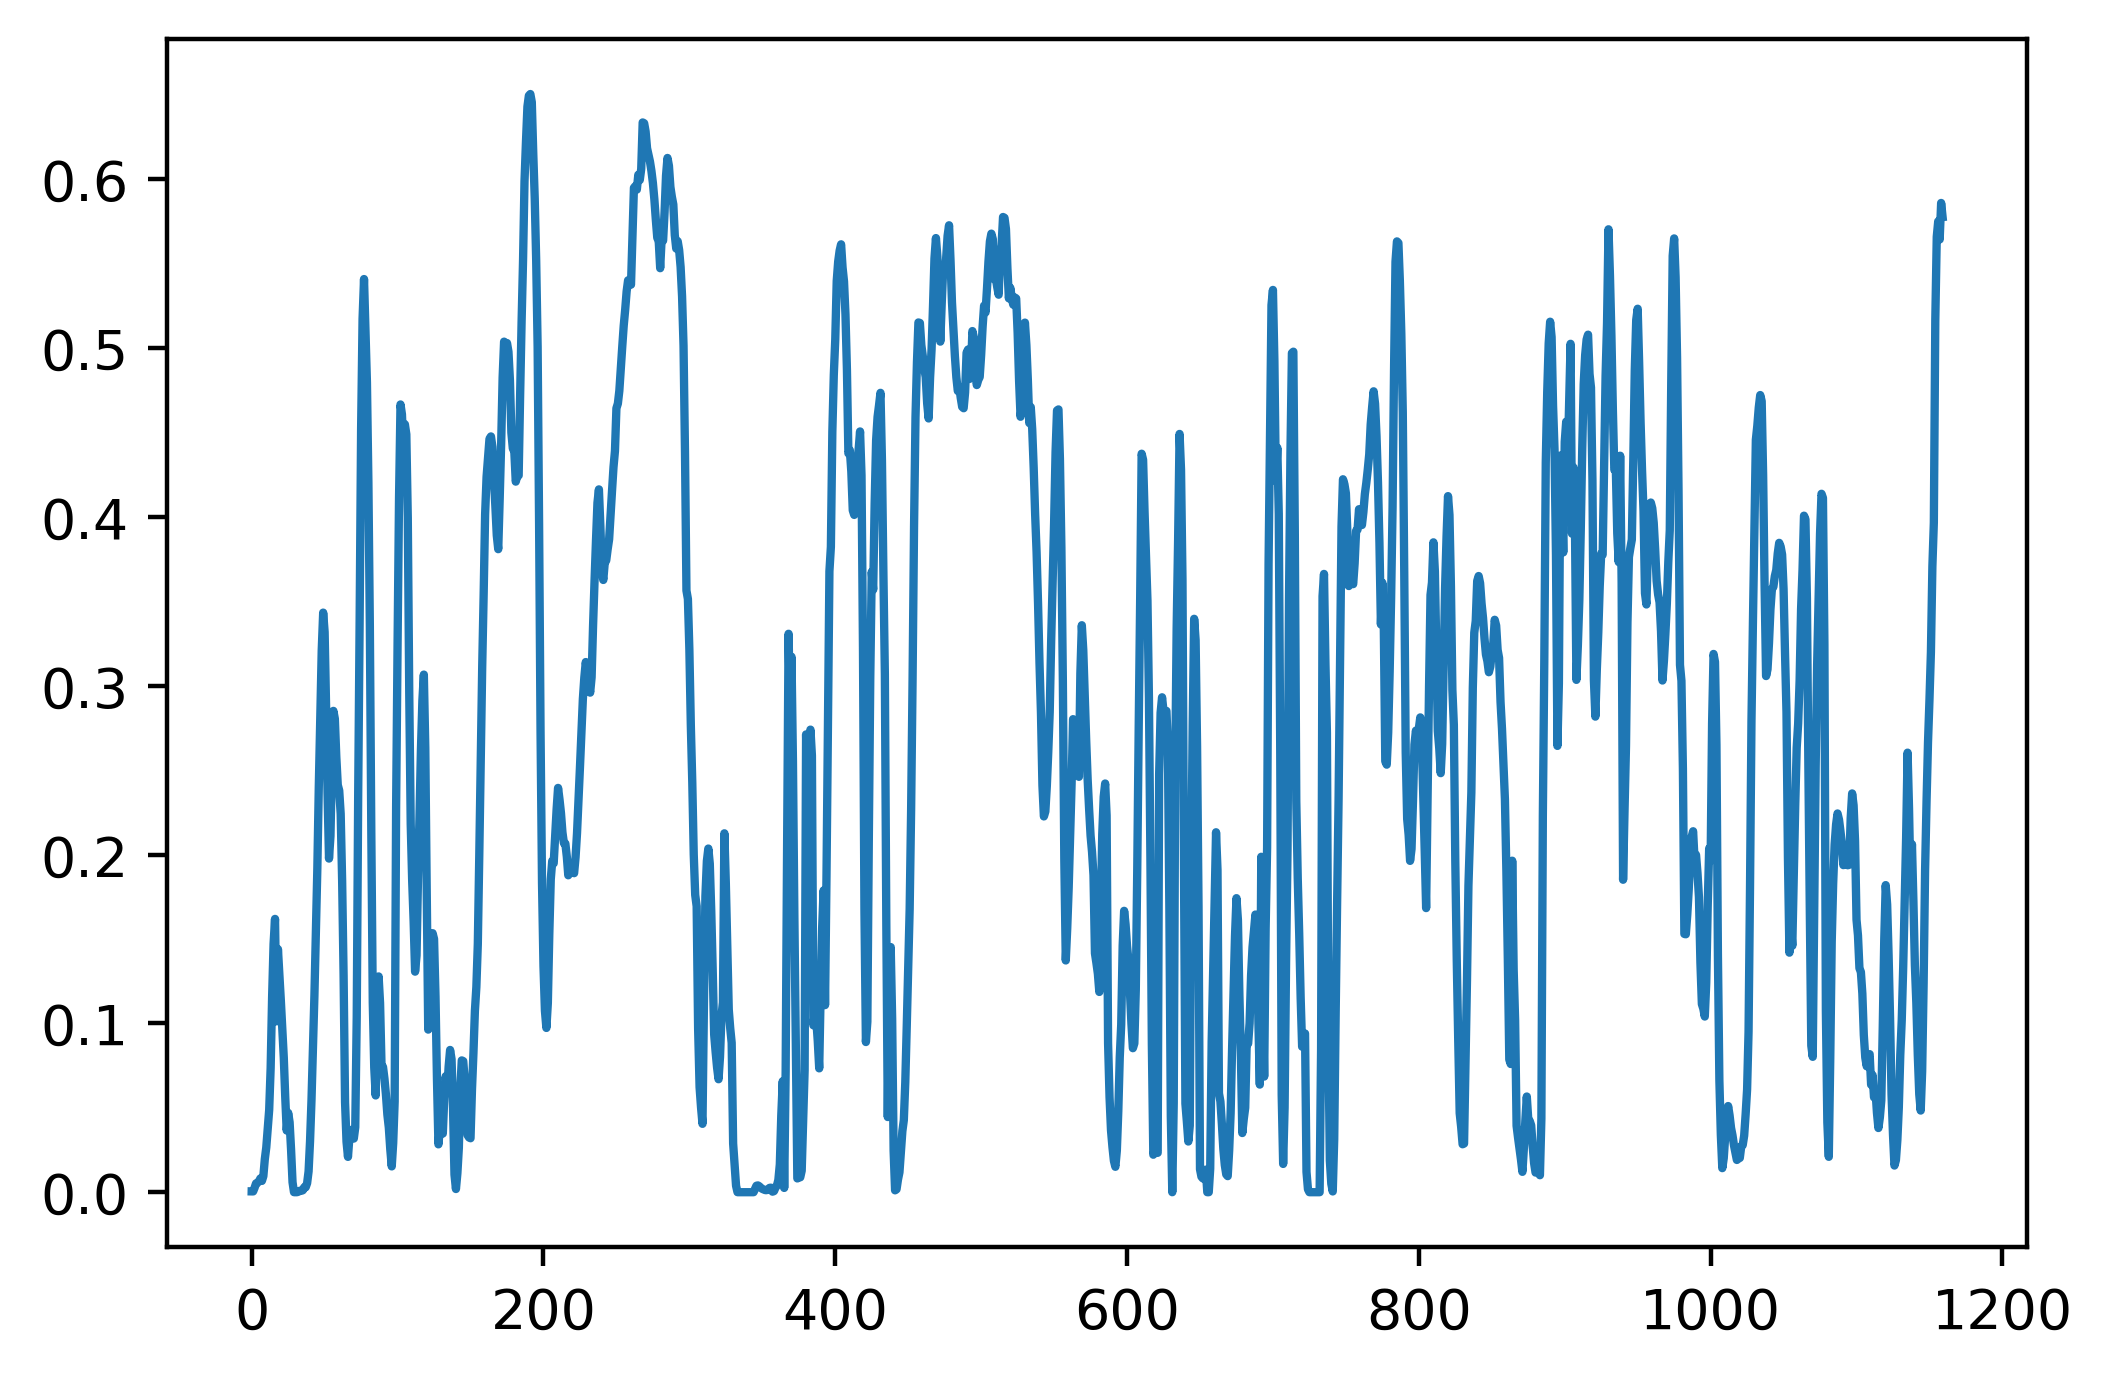

2 0.5695159629248198 1045


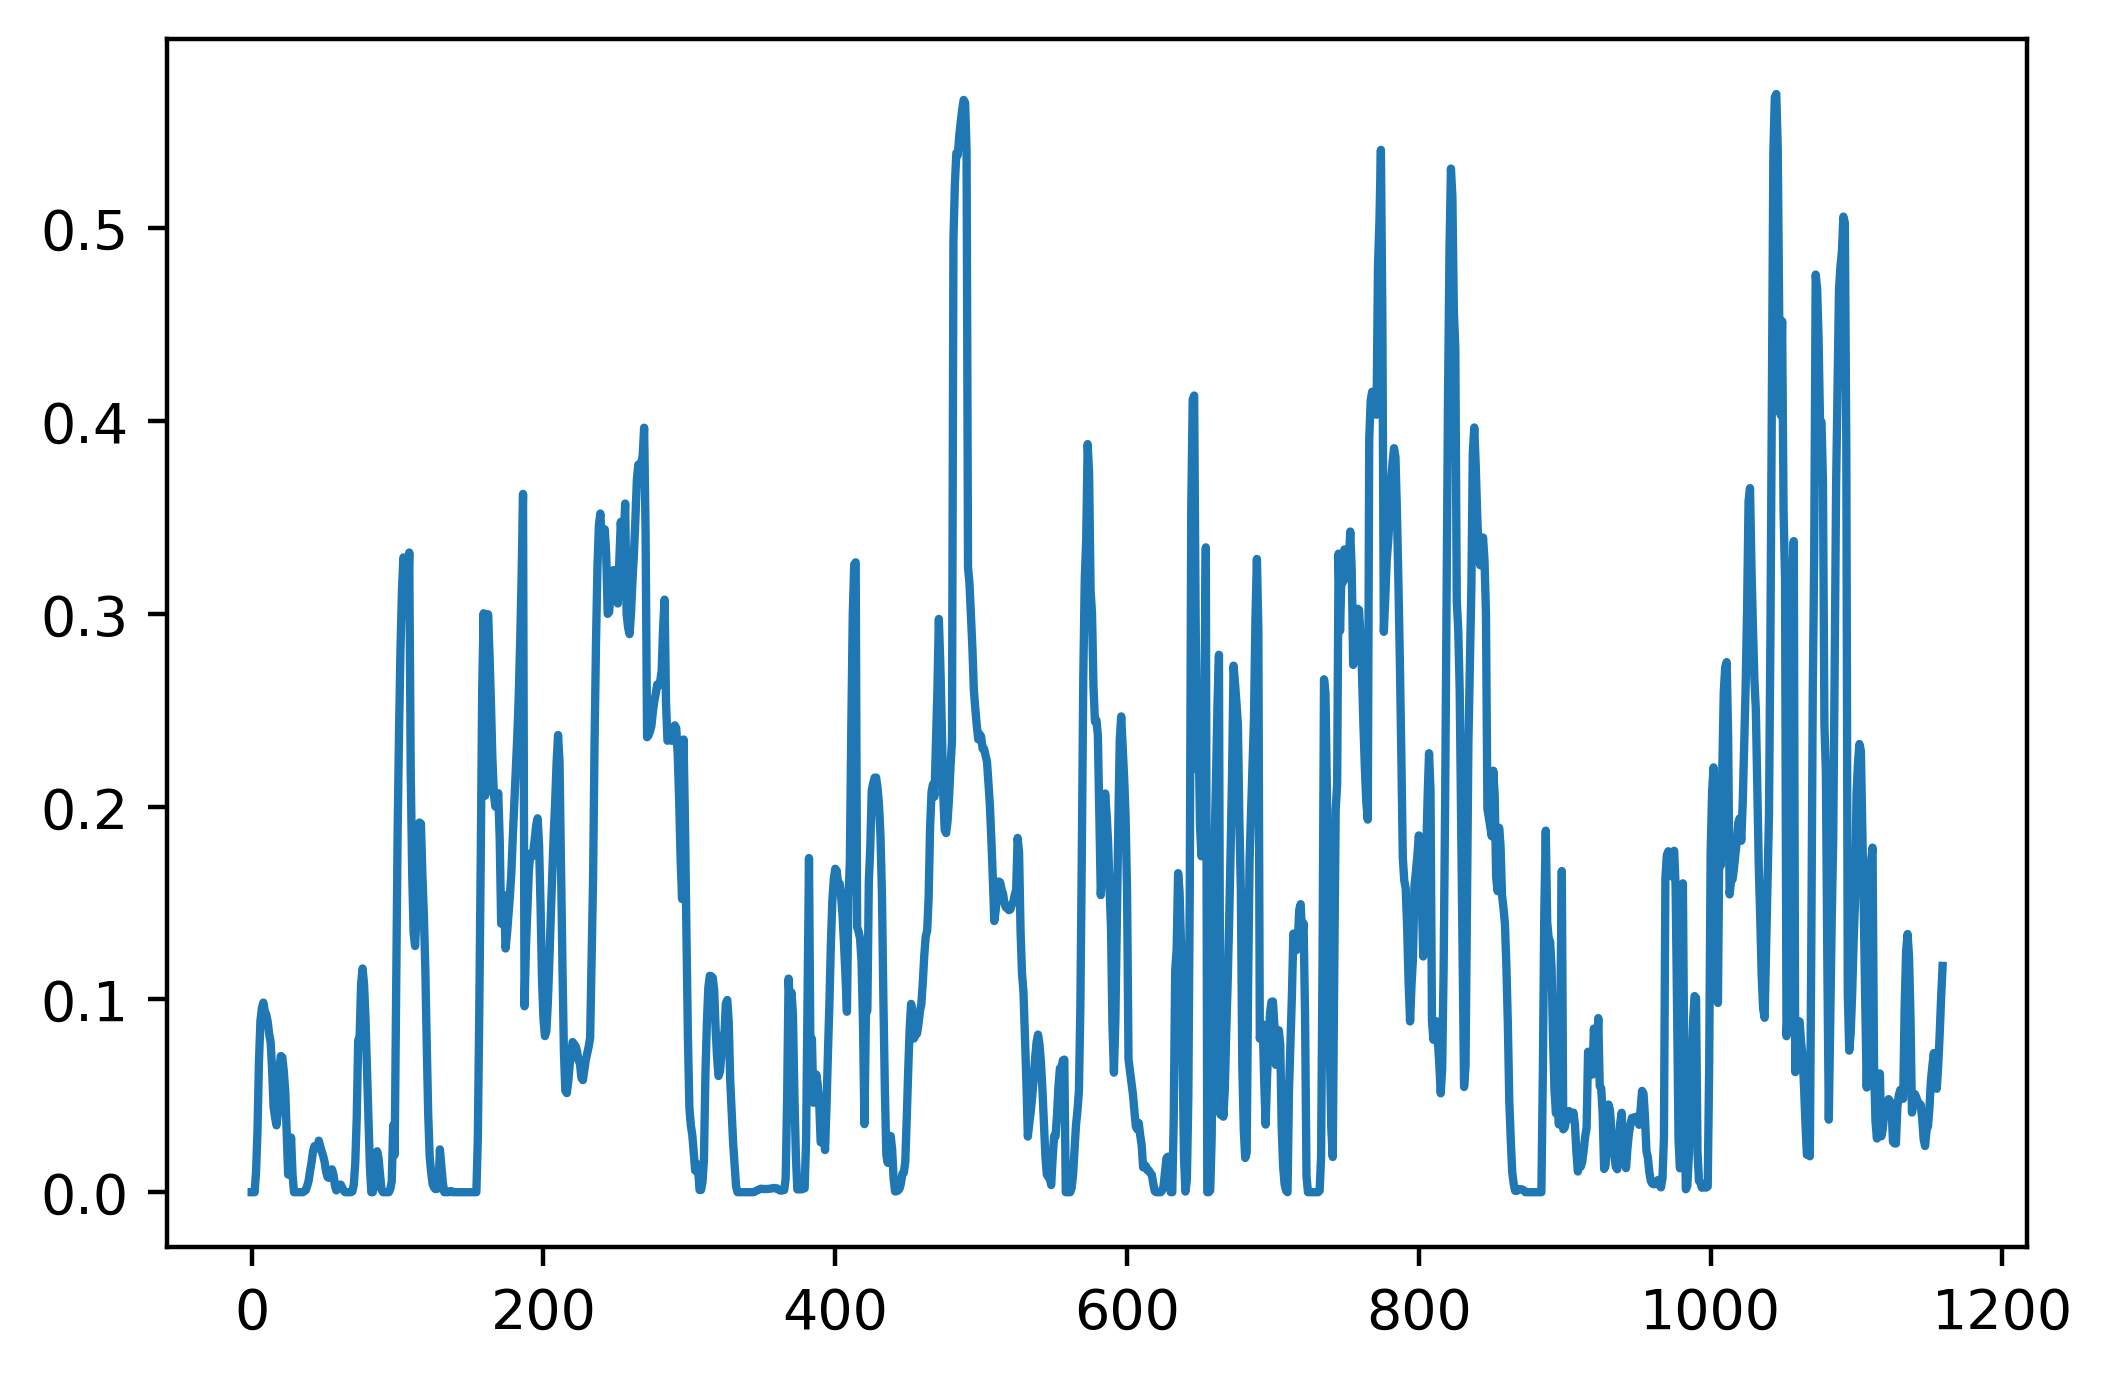

3 0.3445776414831335 1112


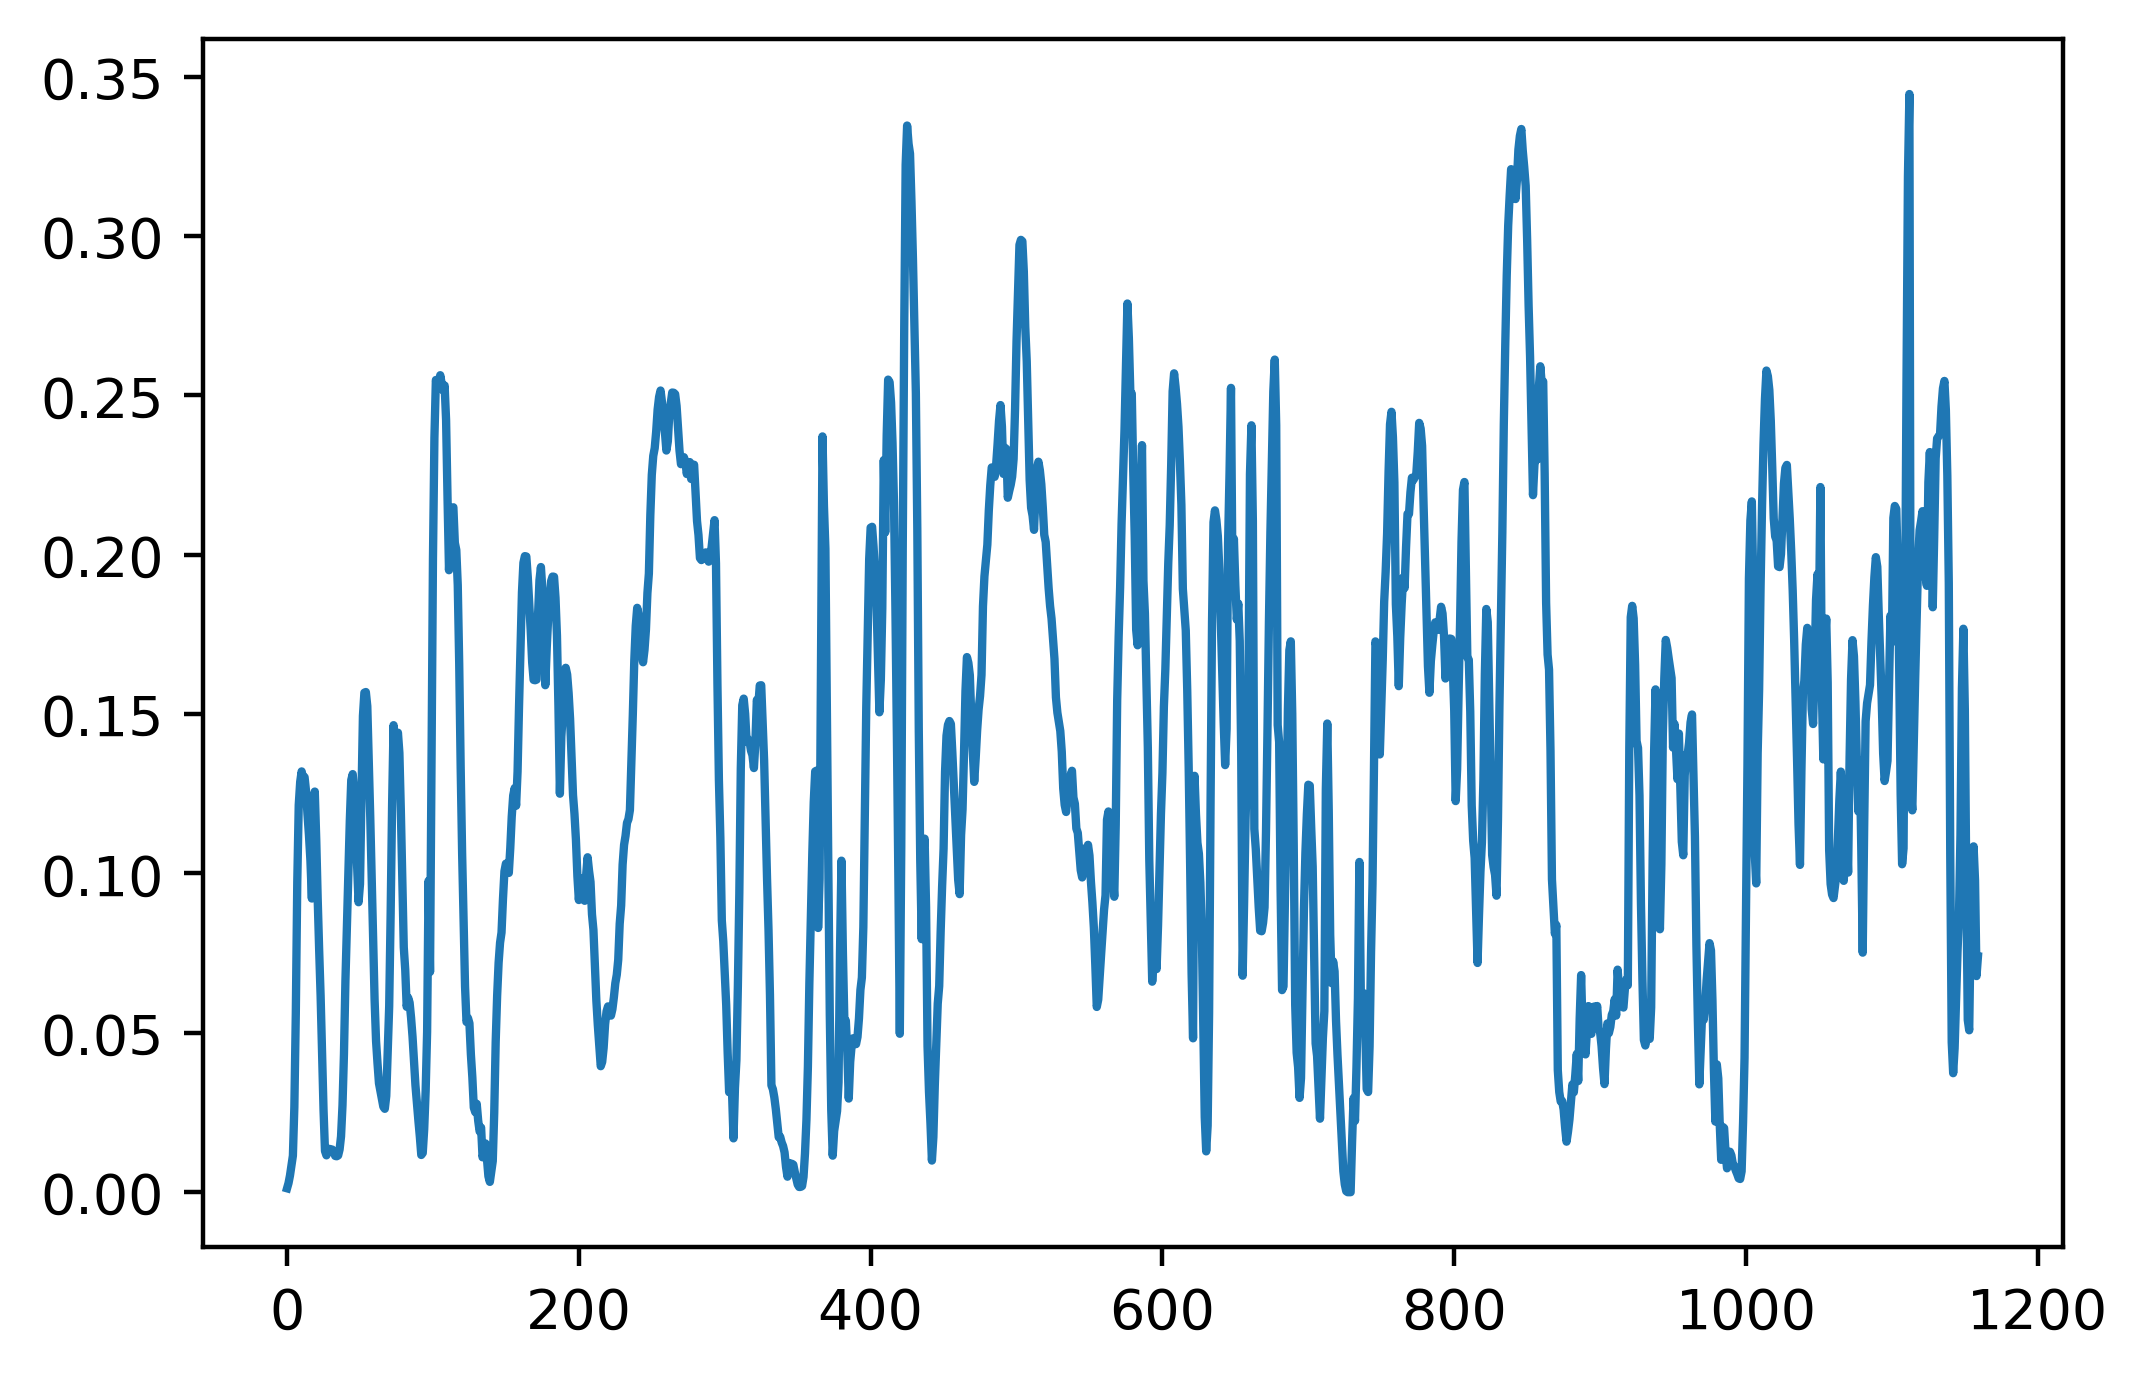

4 0.4249596557288865 85


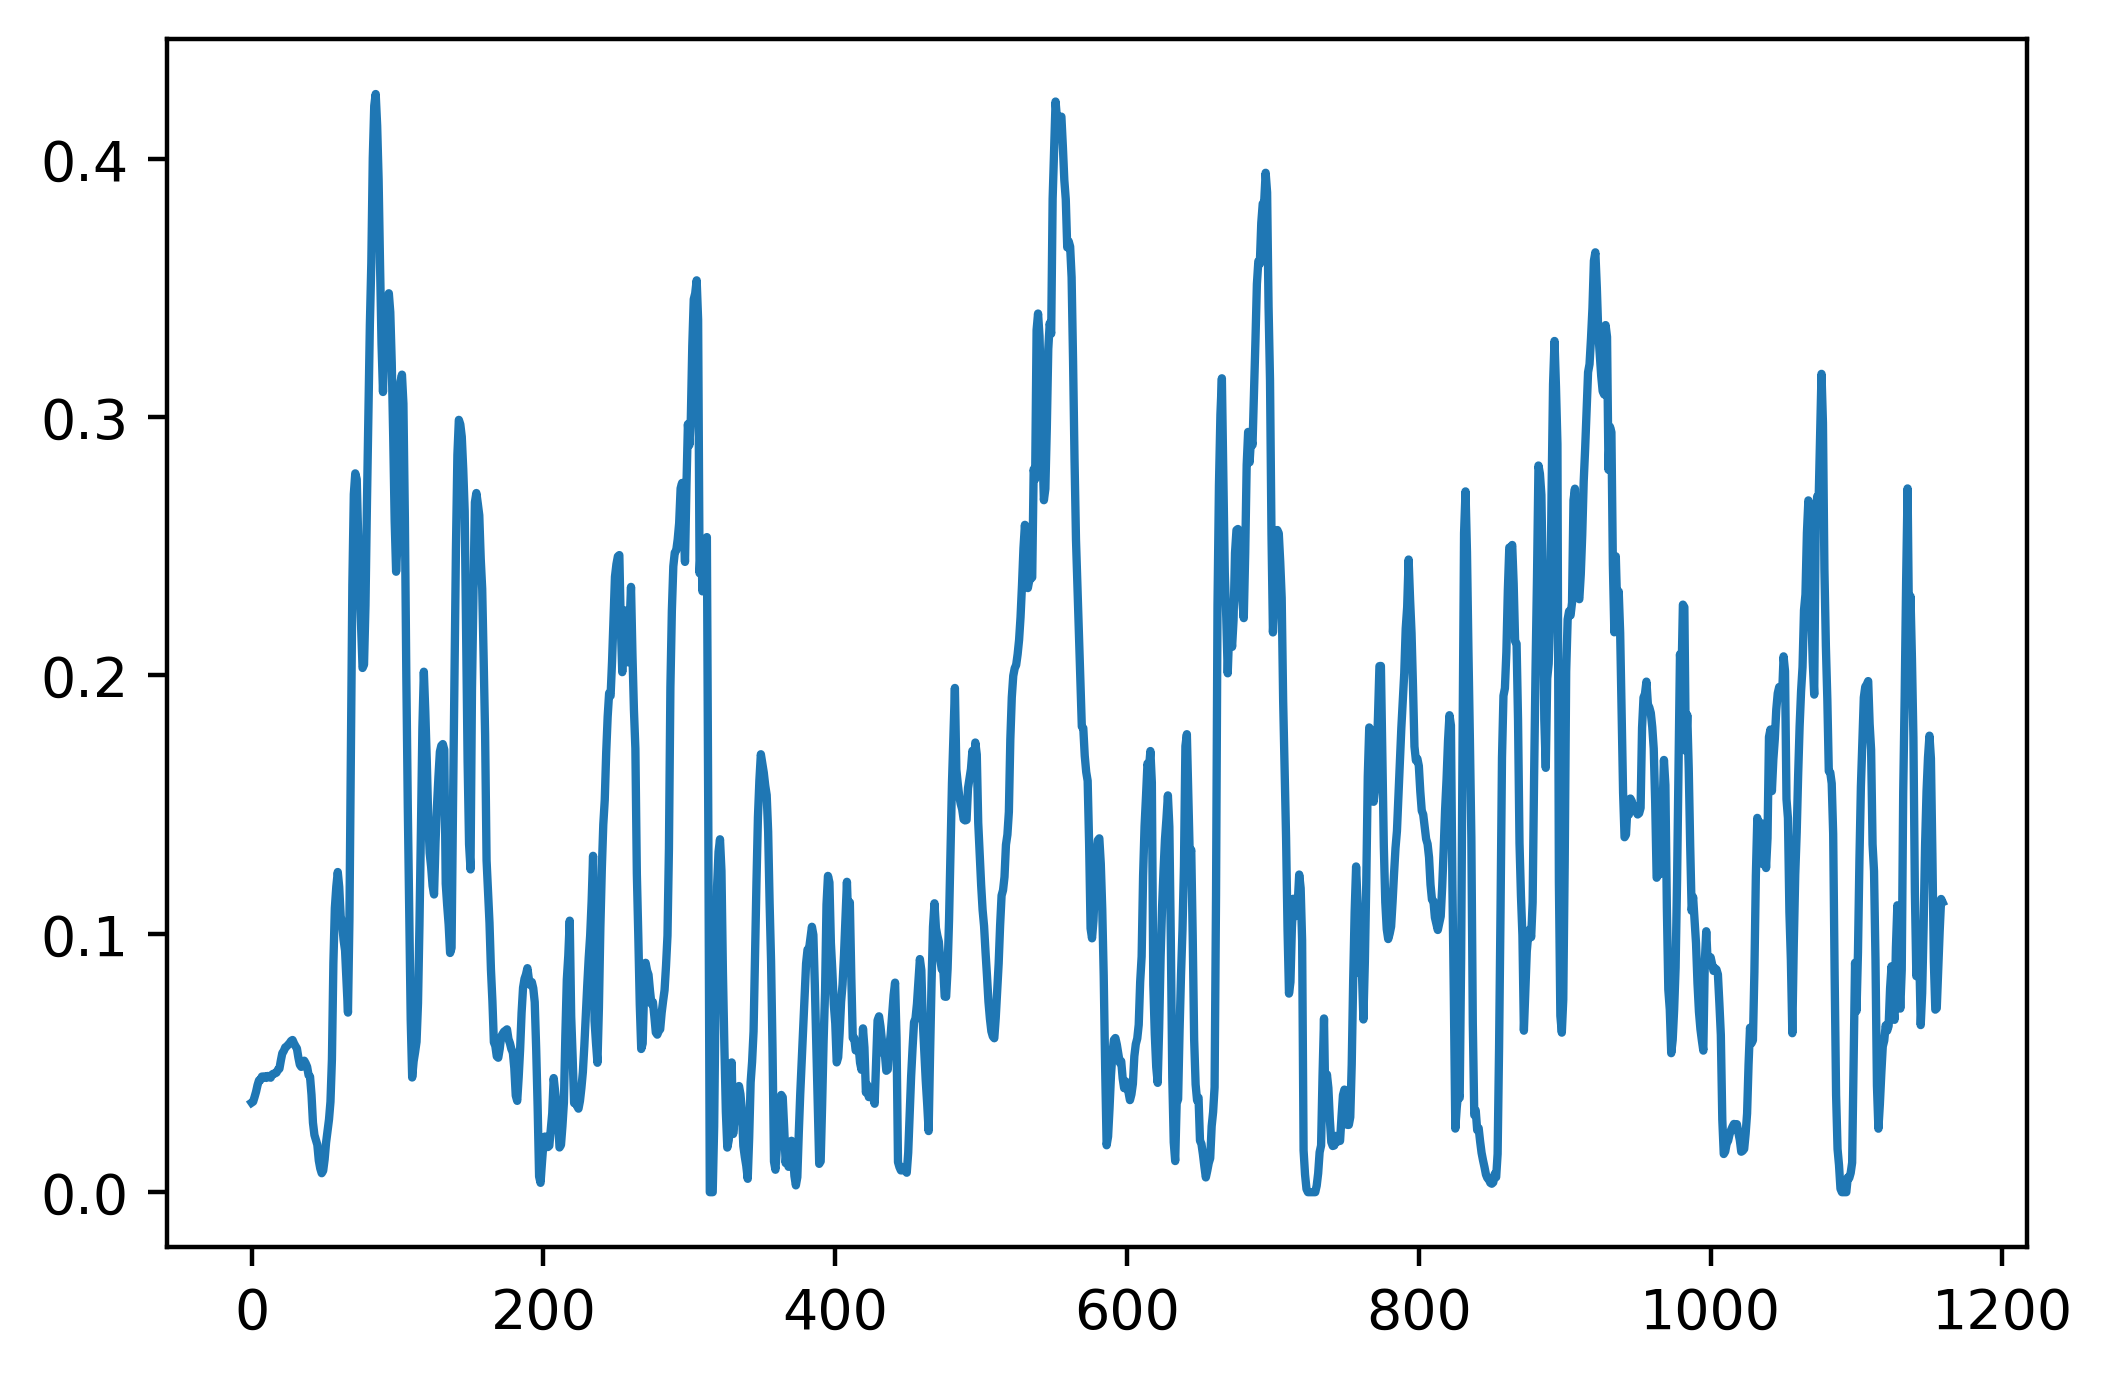

5 0.4473684210526316 449


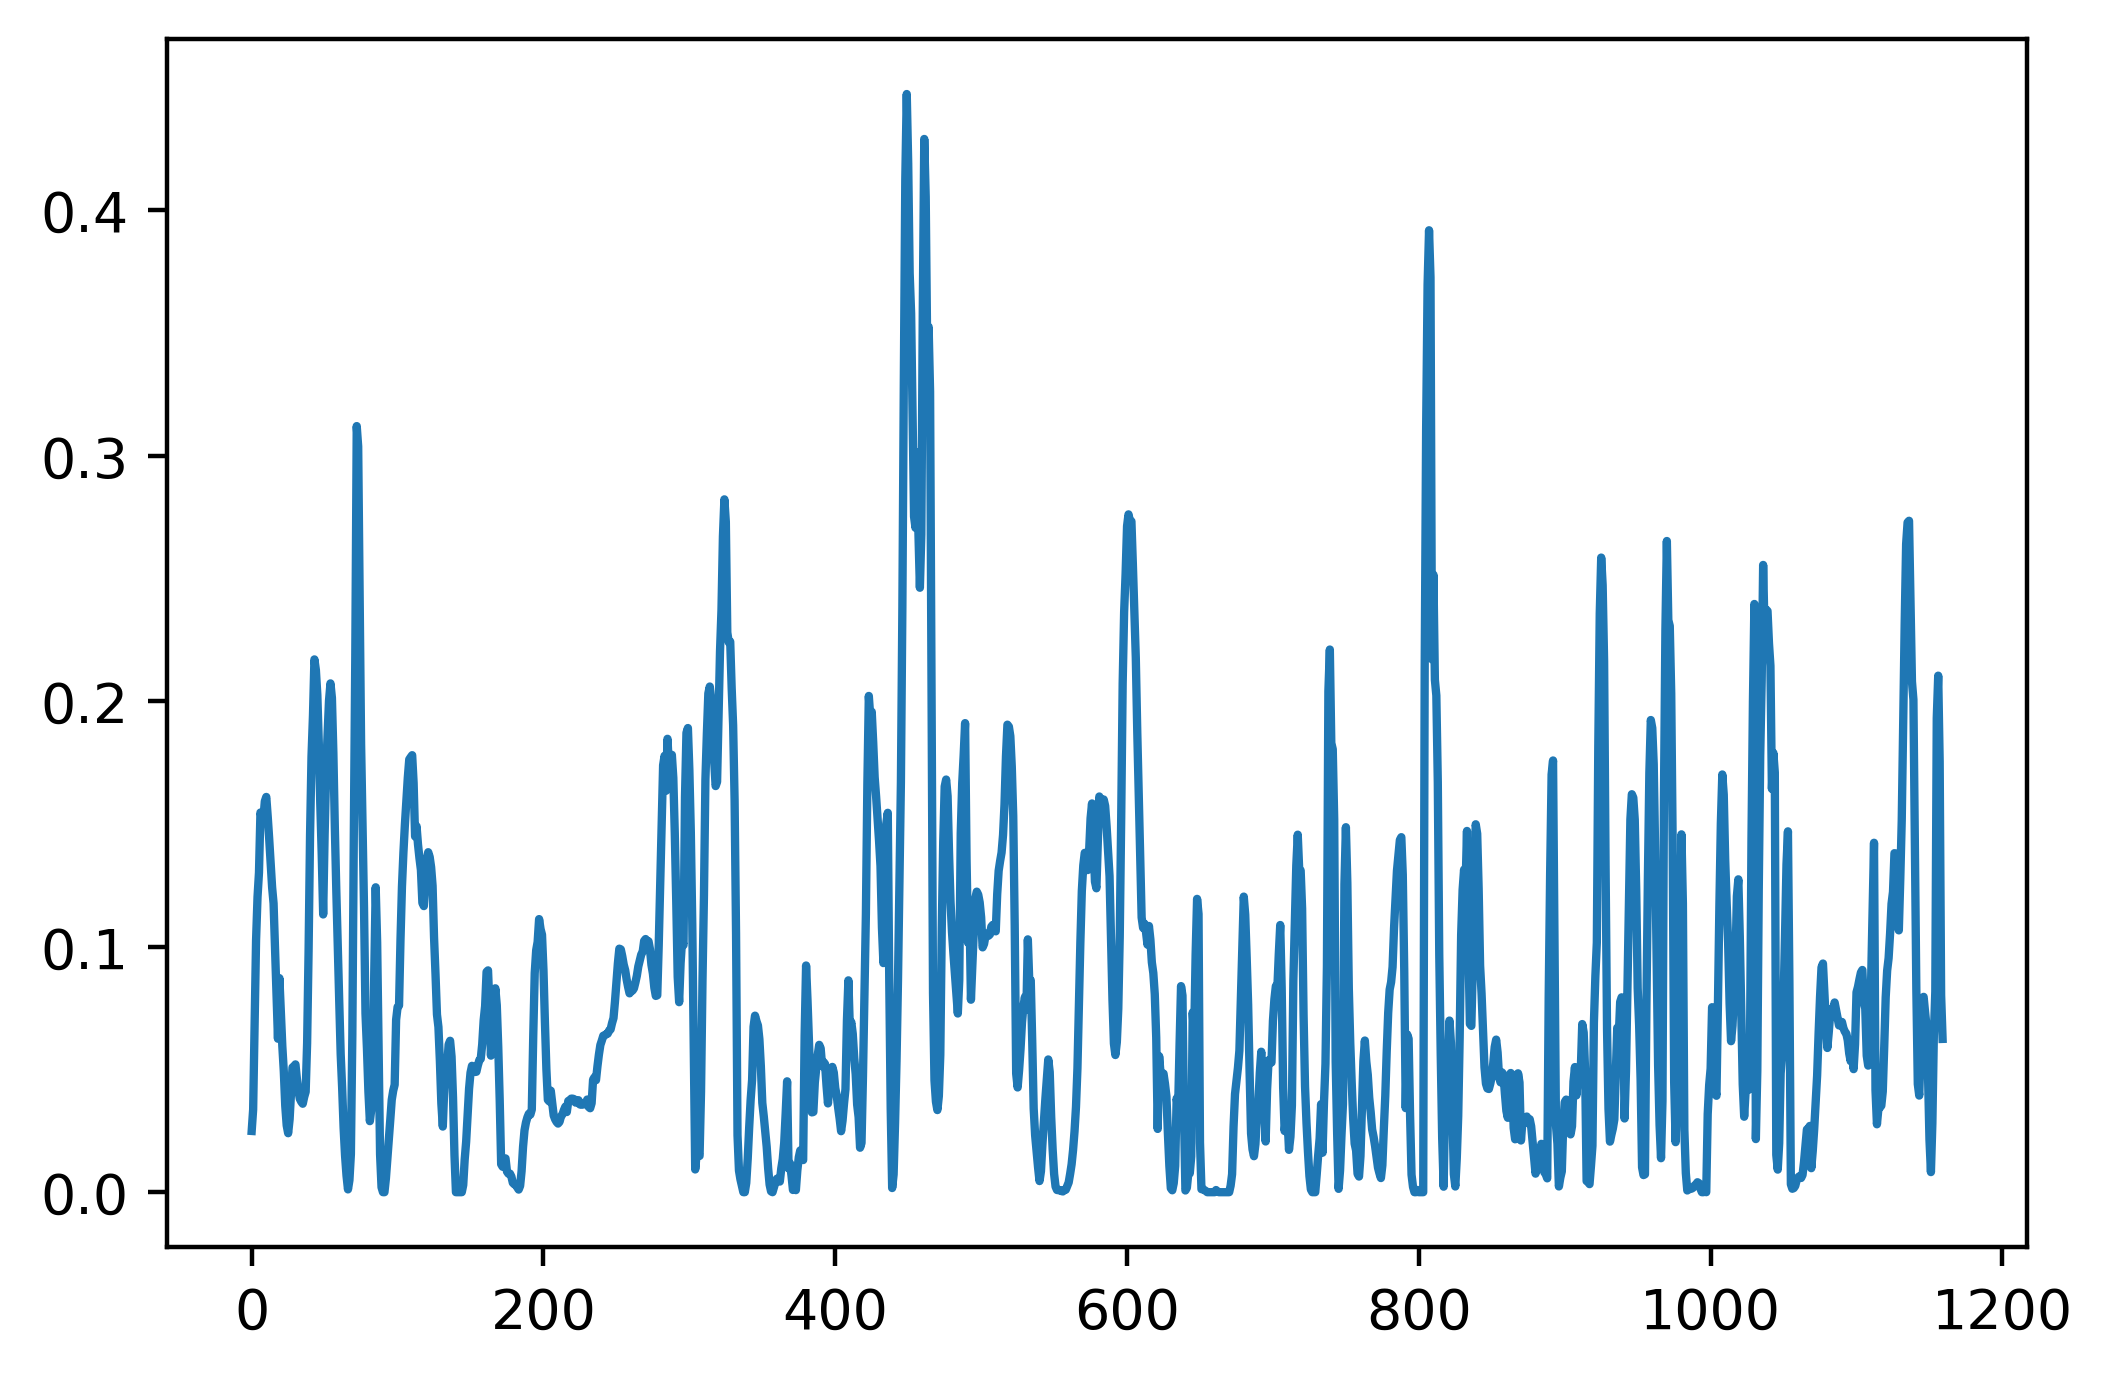

6 0.39003880983182404 1148


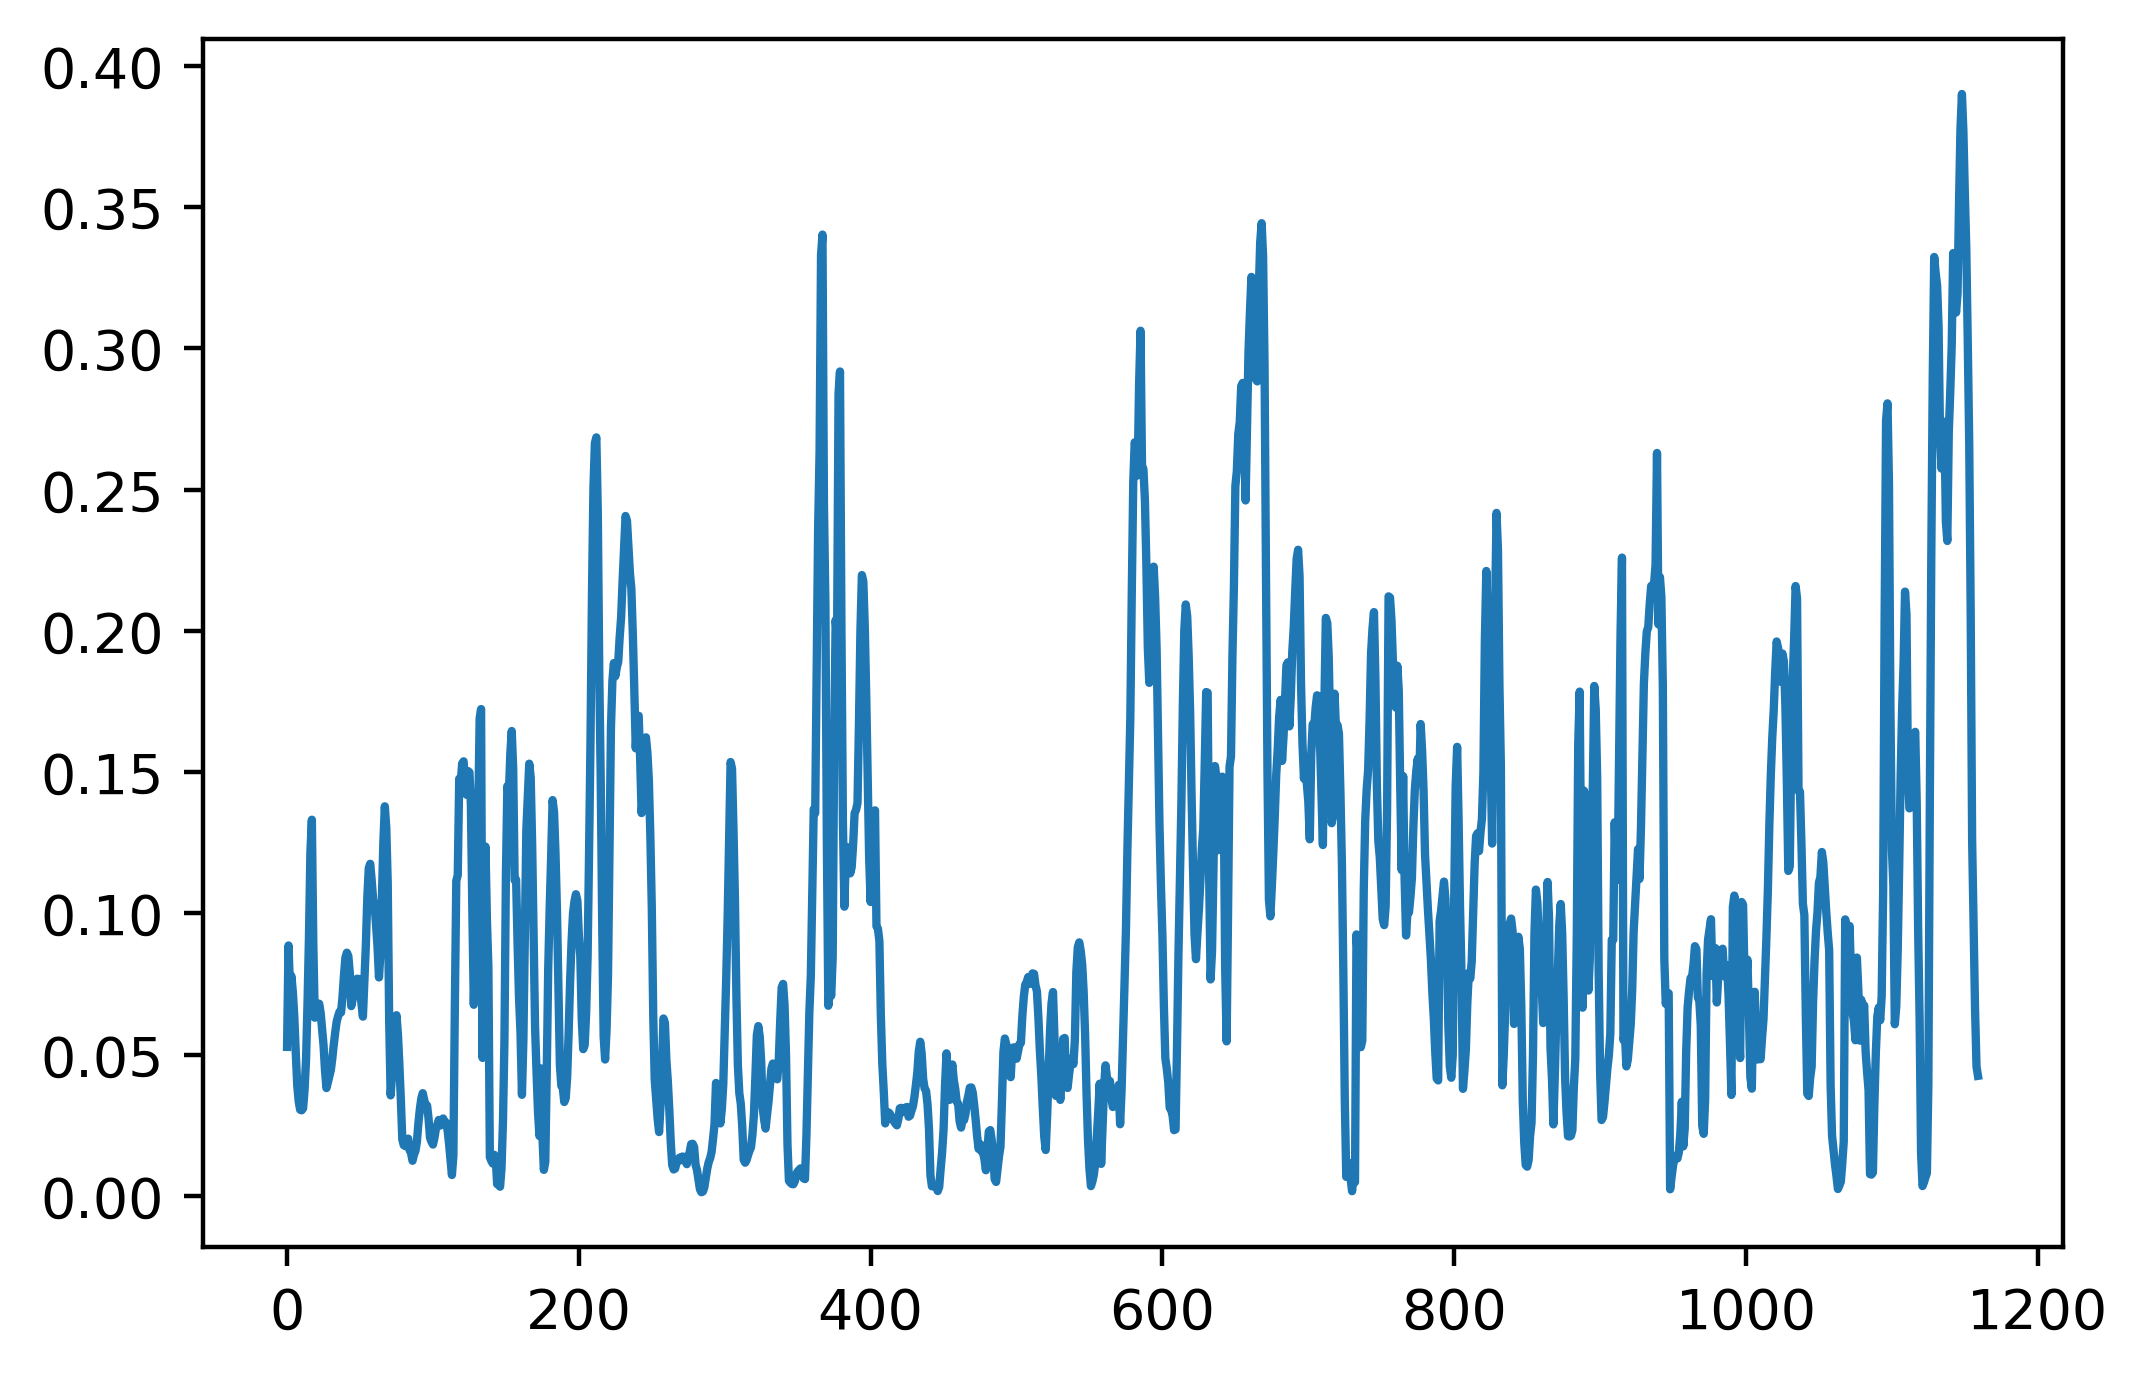

7 0.42843534174803527 624


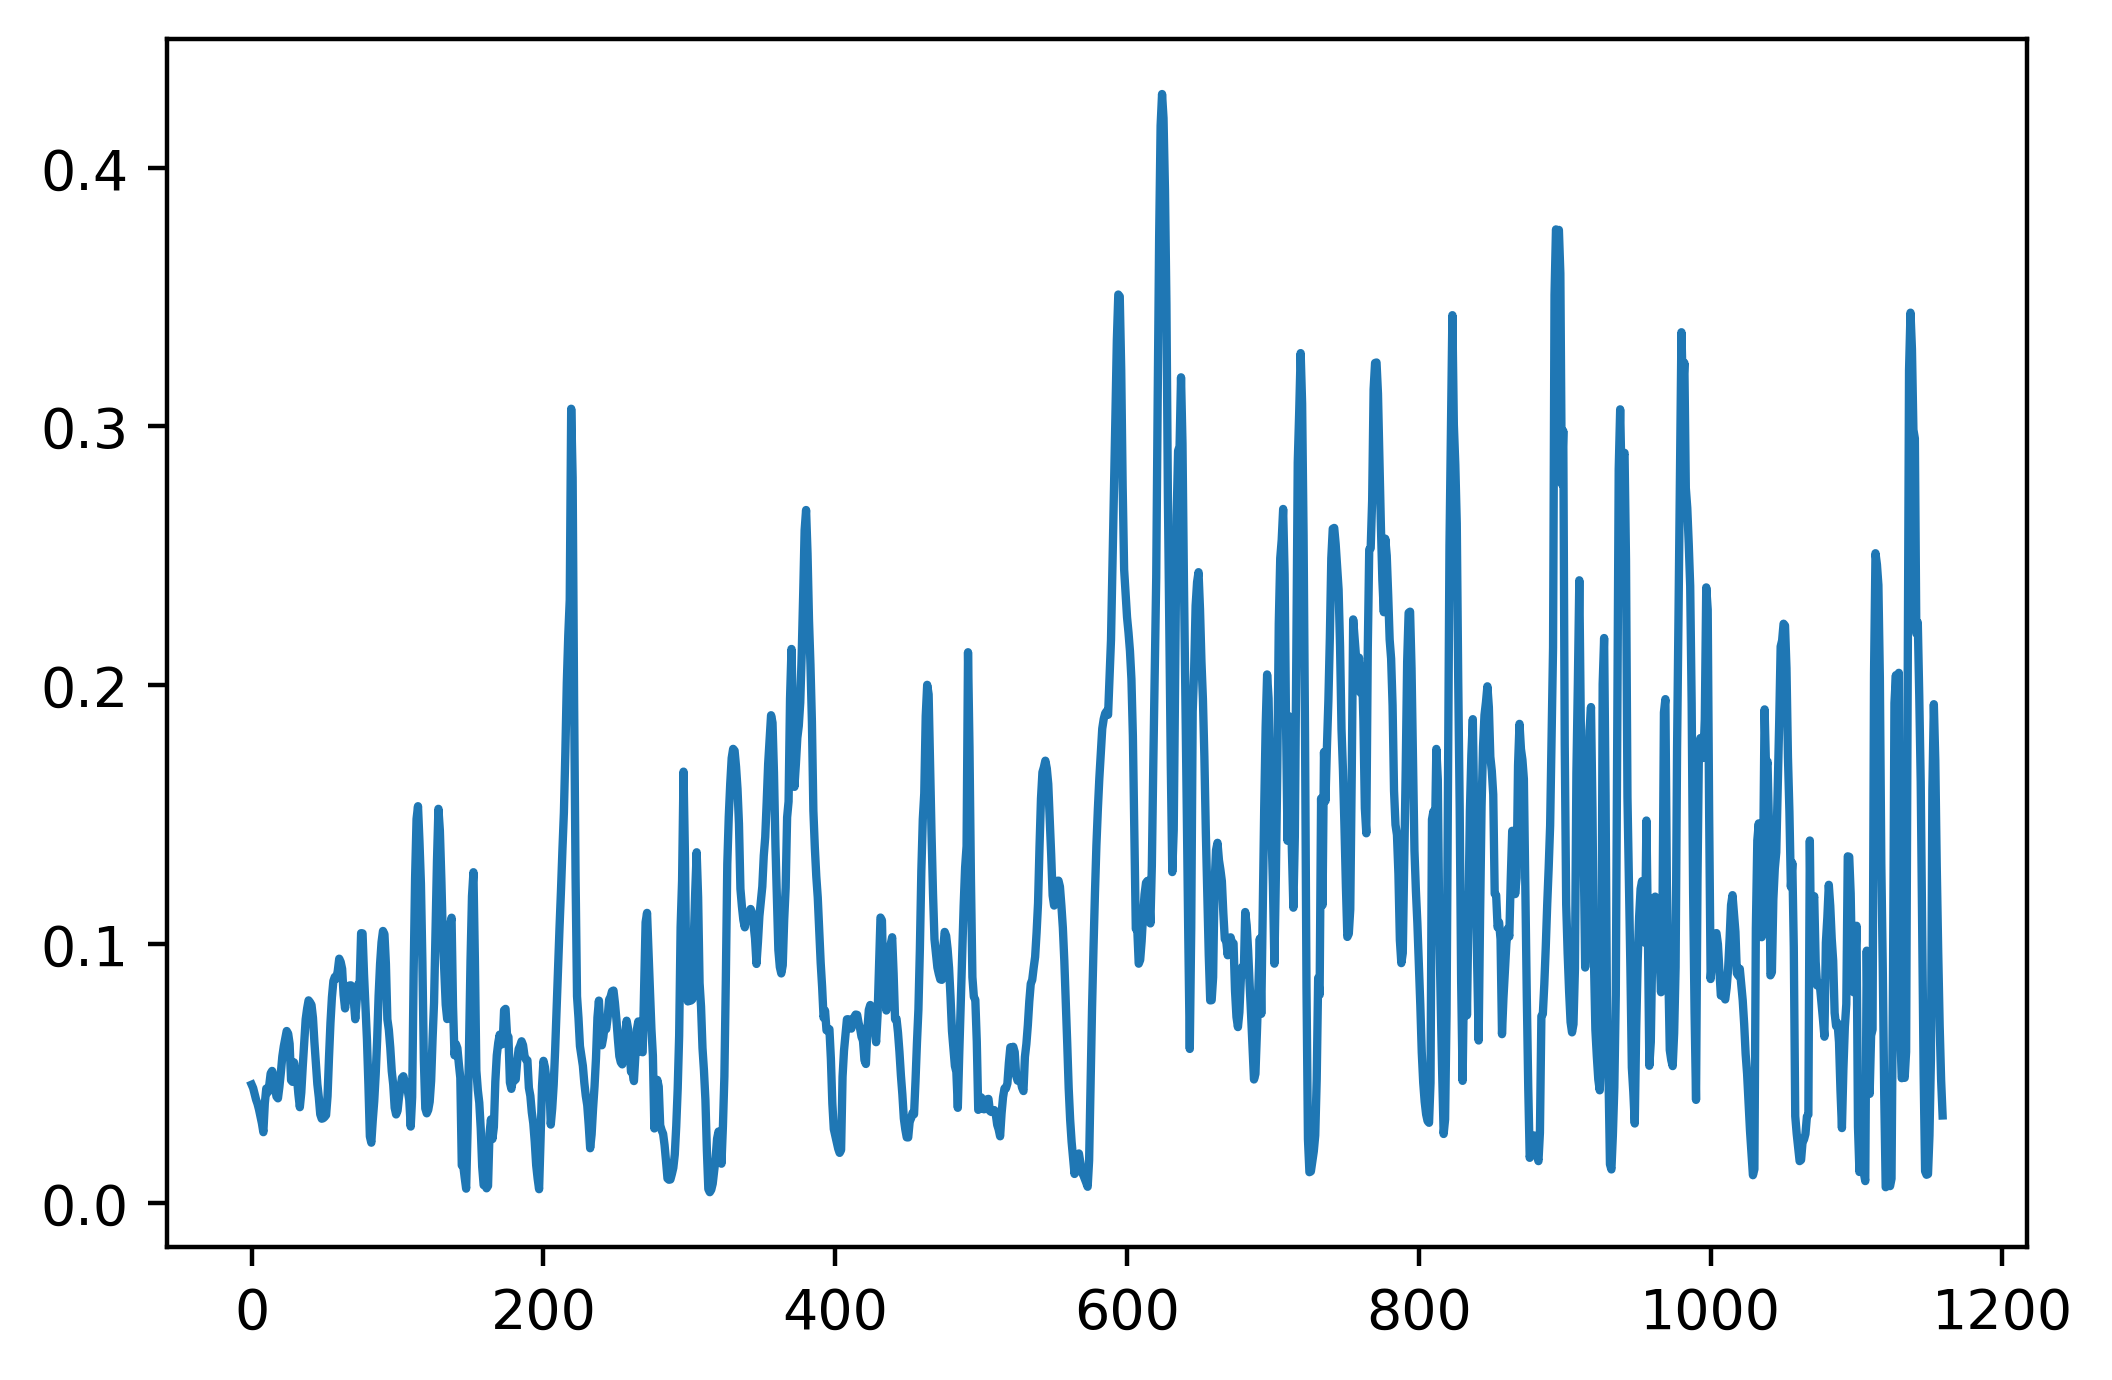

8 0.315934909425852 11


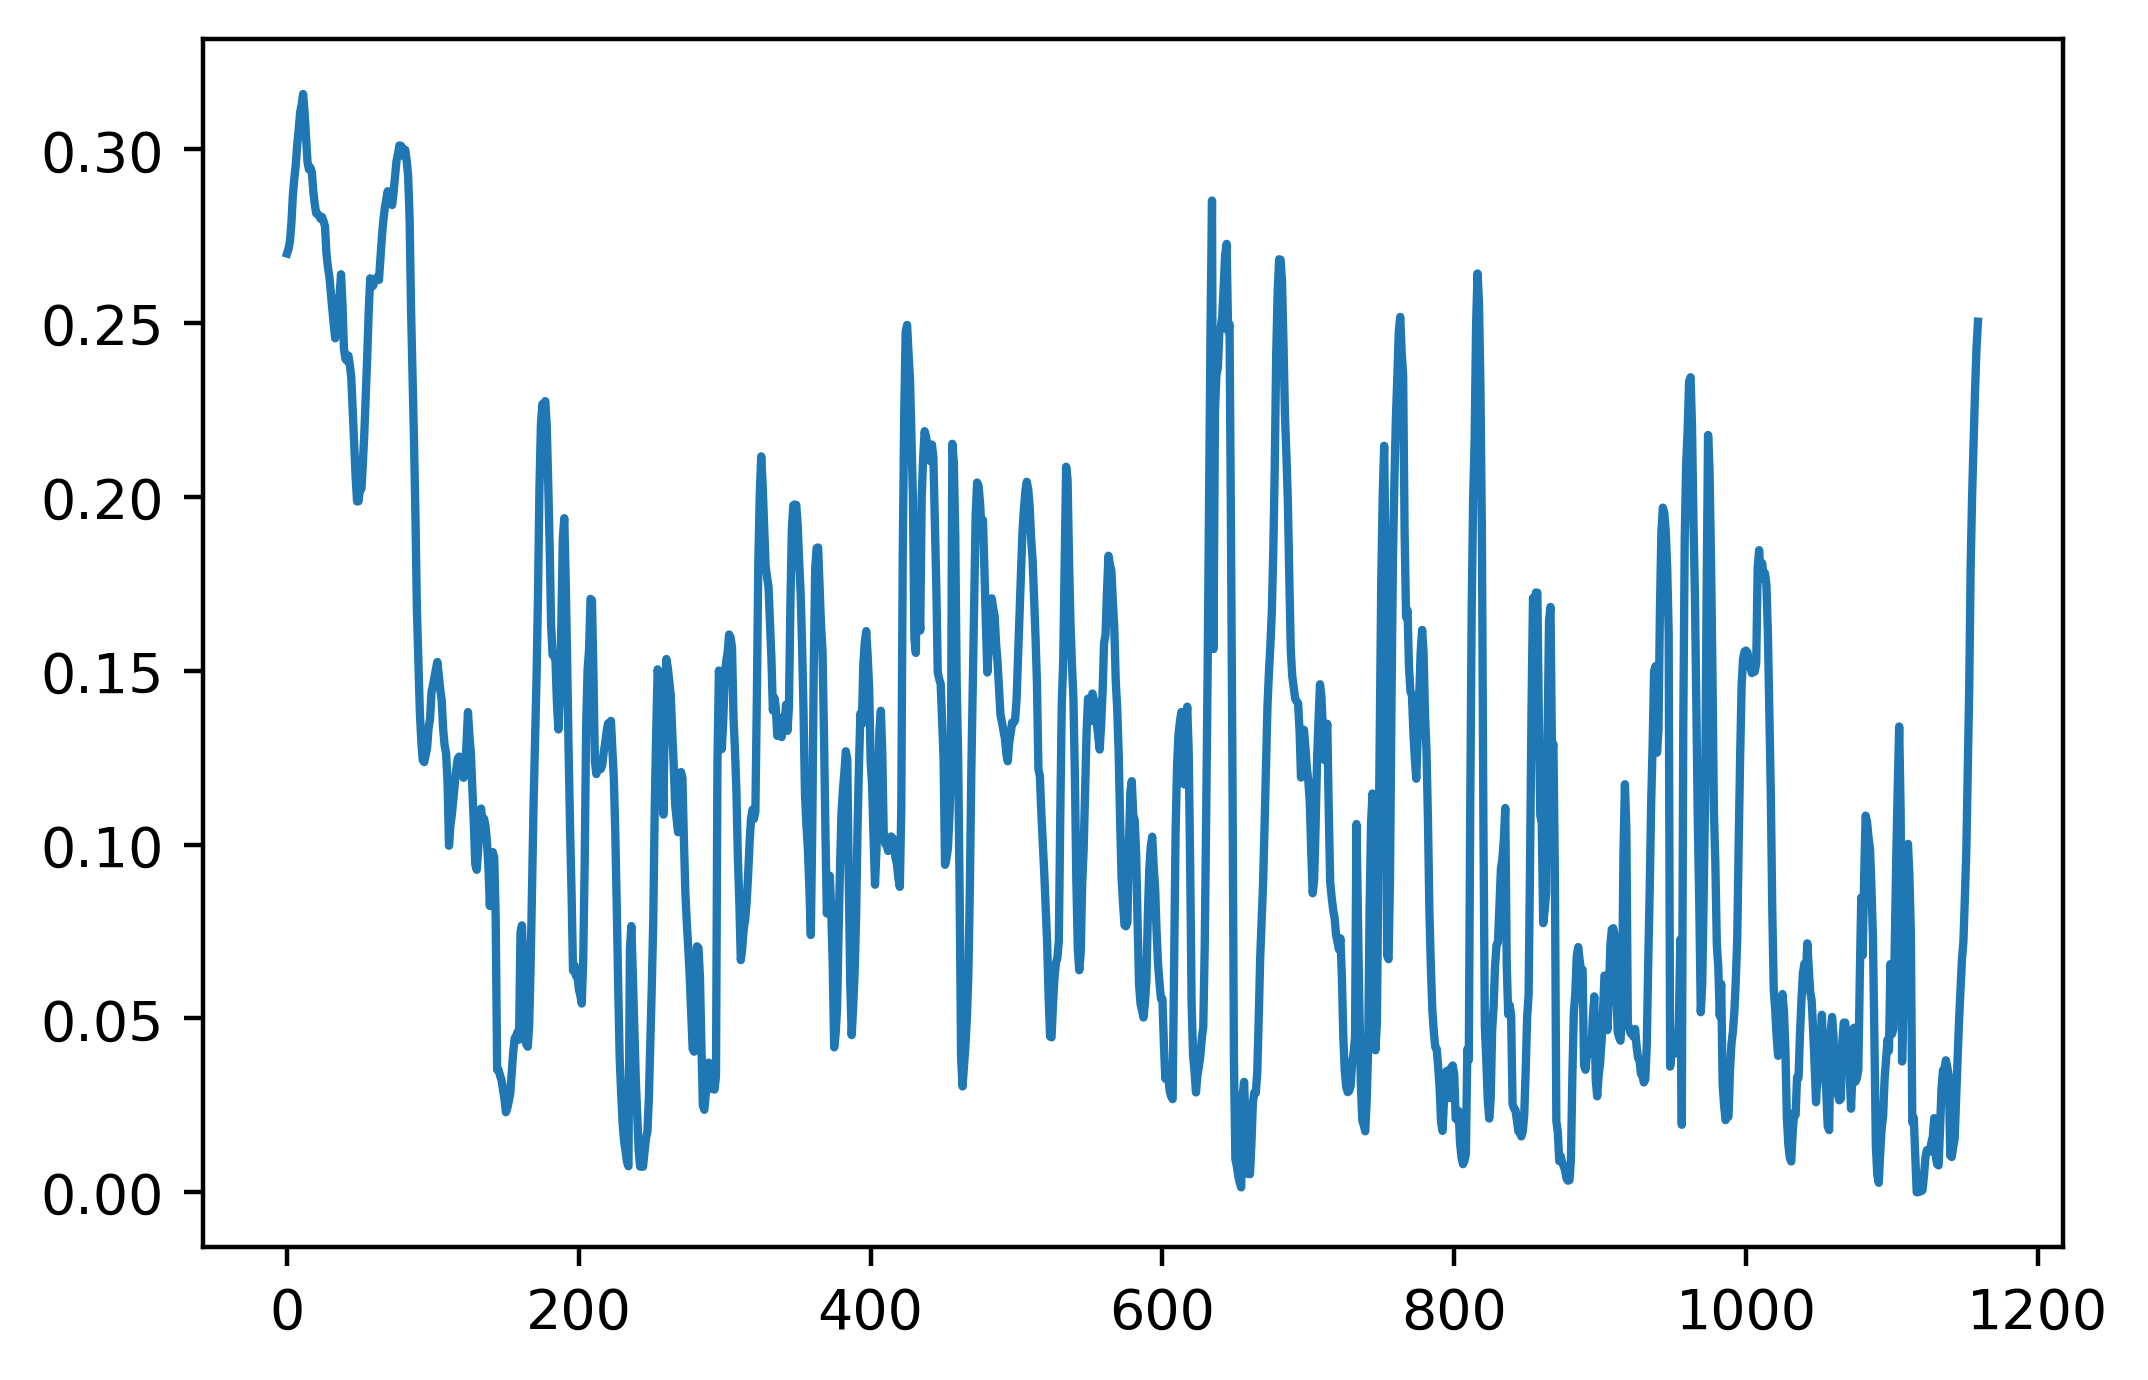

9 0.26280737704918034 415


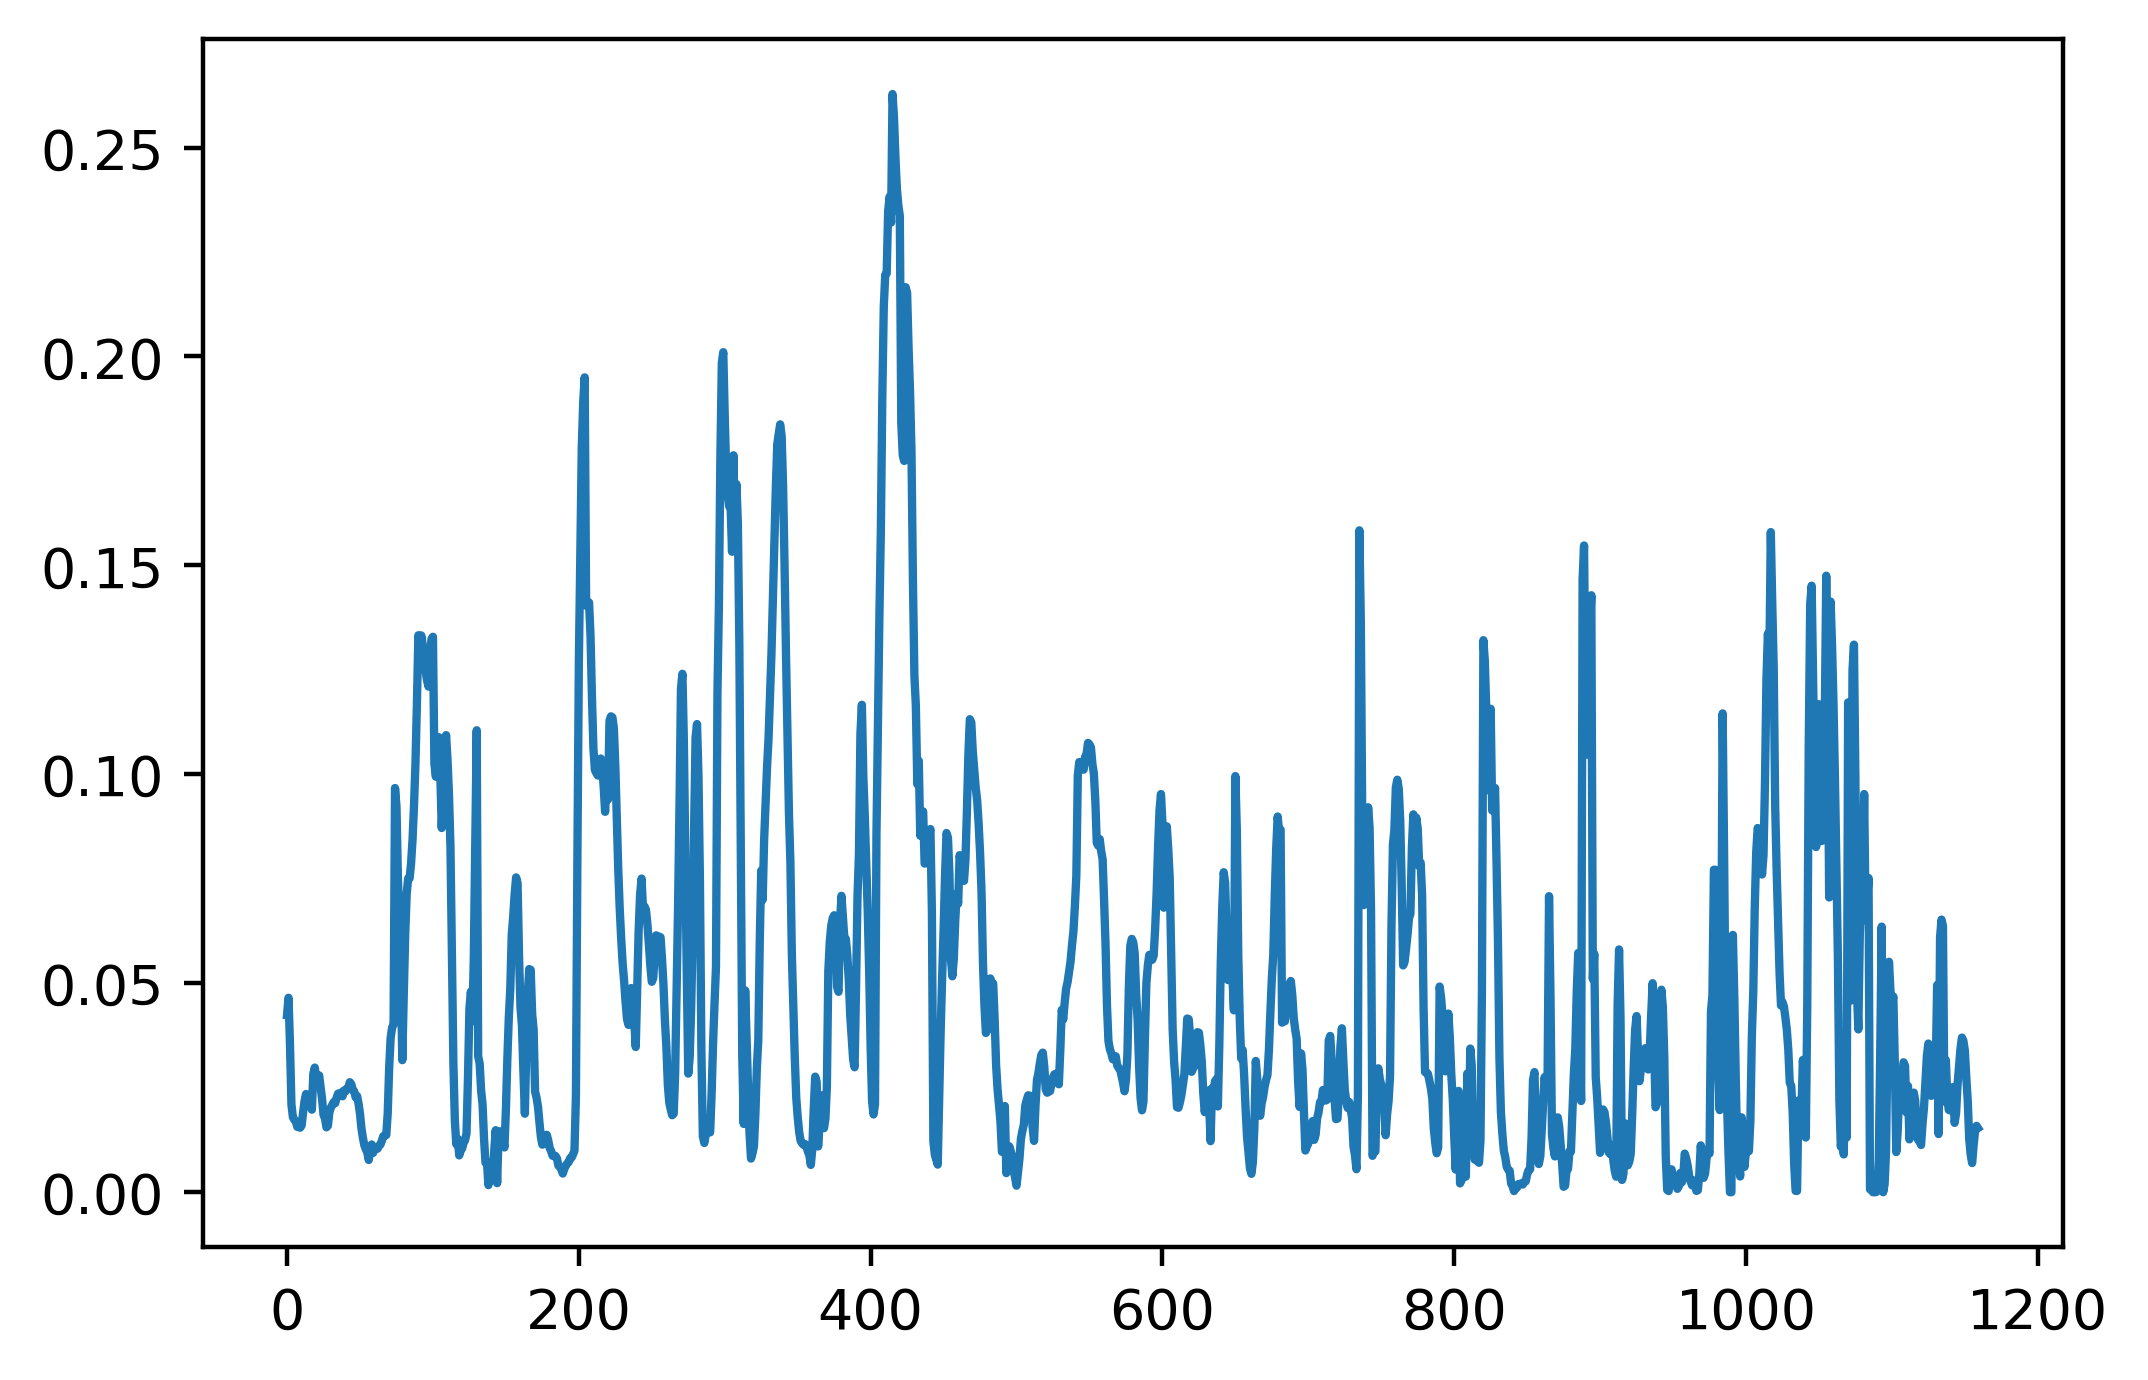

10 0.2596949891067538 620


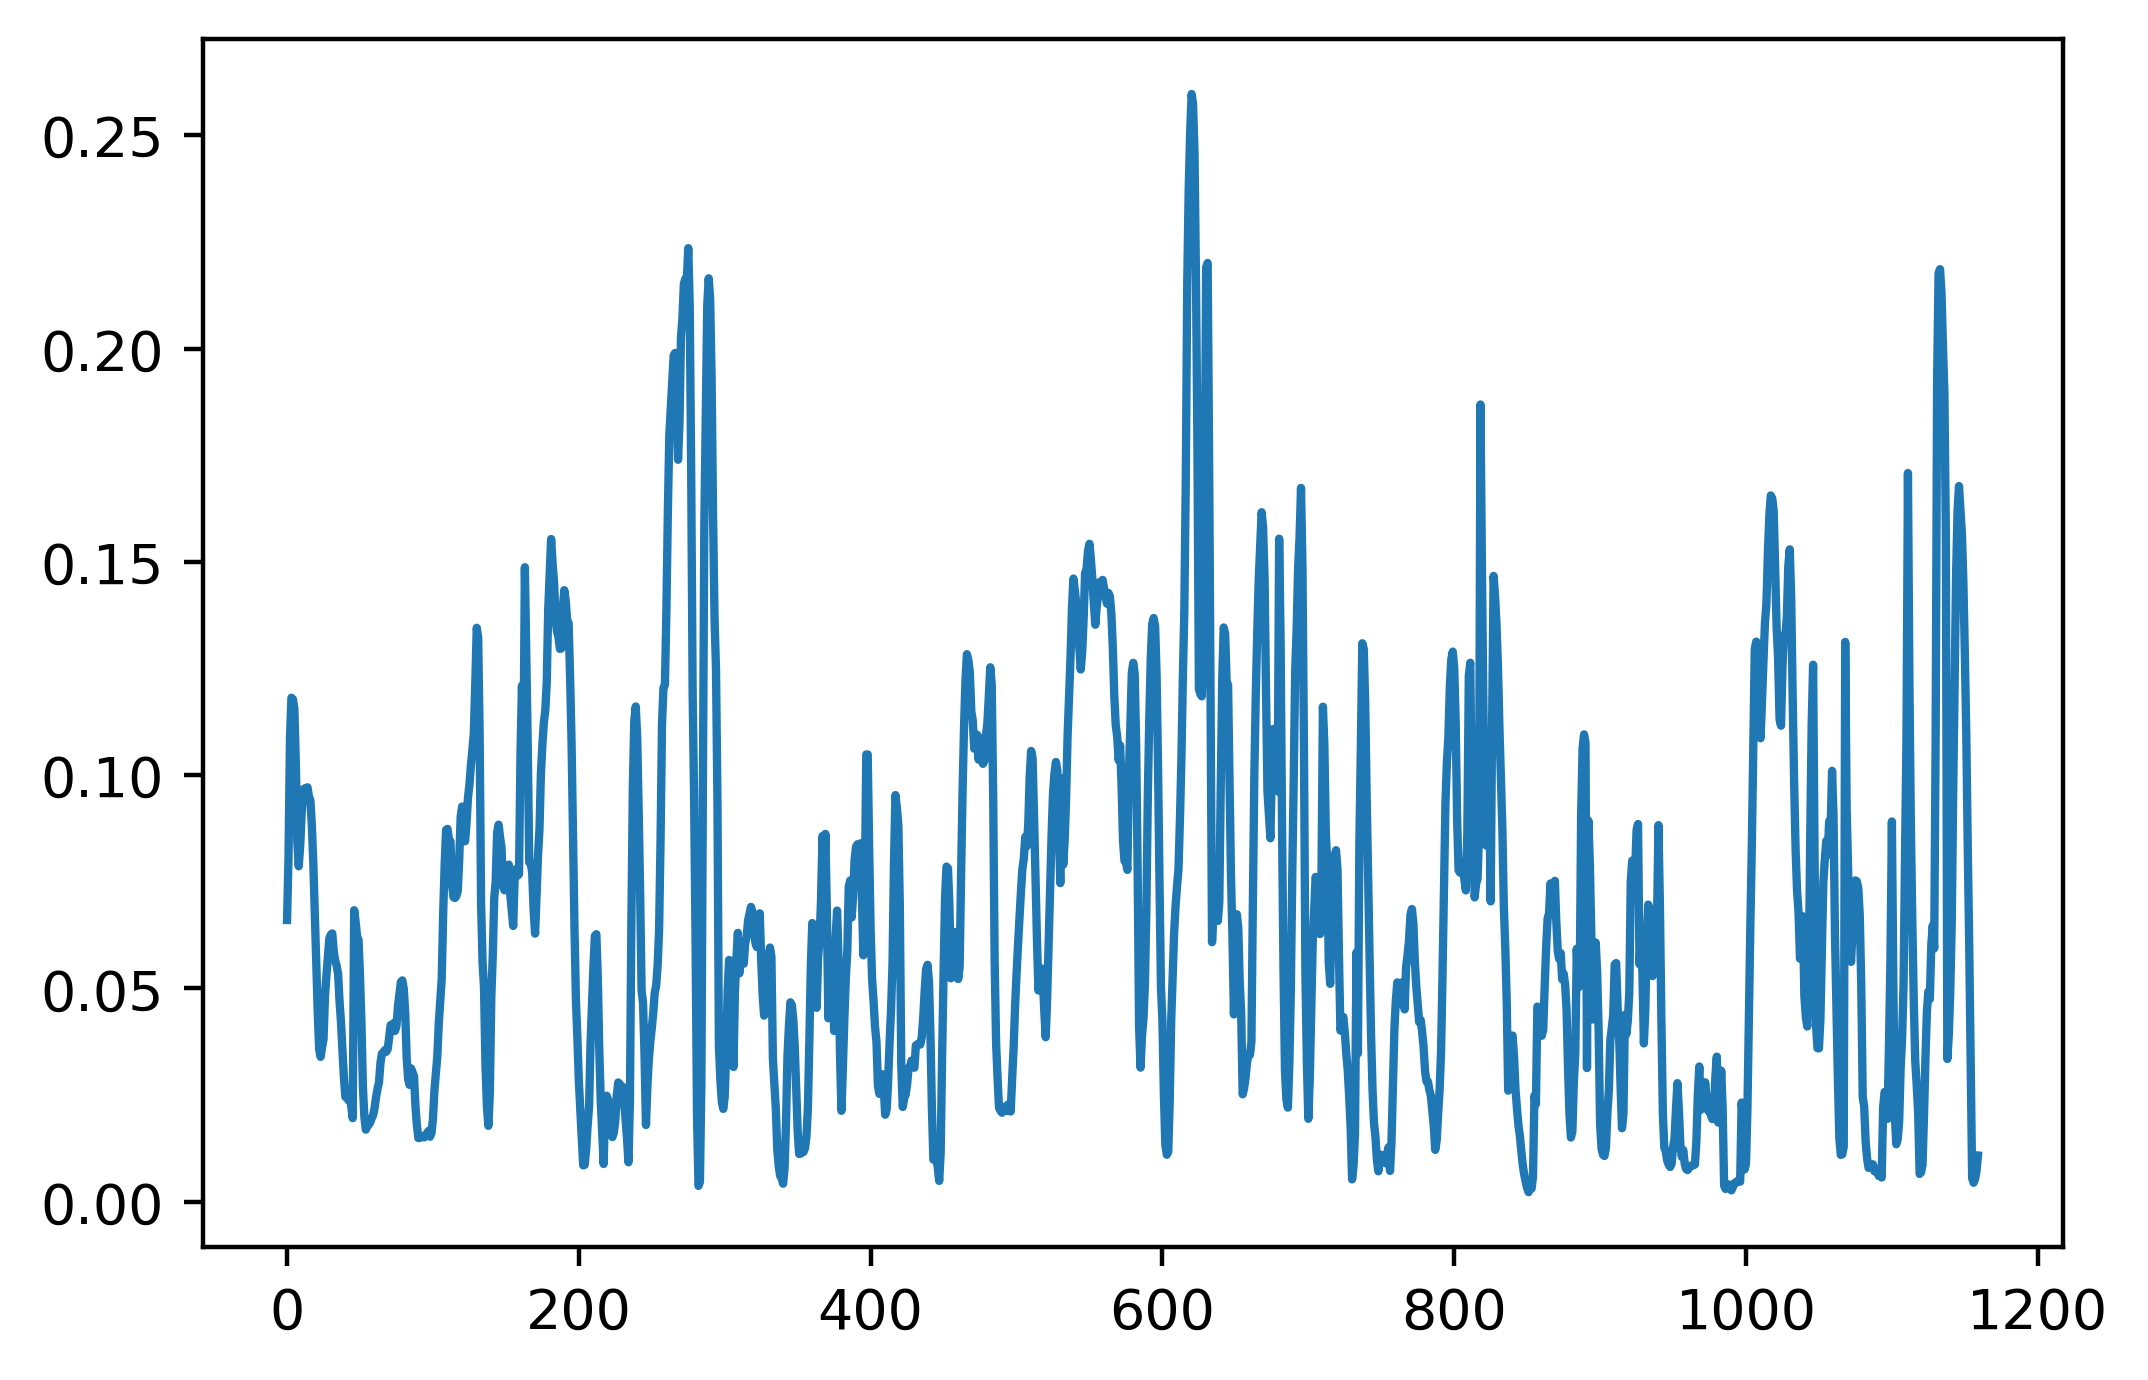

In [7]:
iou_max = np.array(iou_max)
for i in range(10):
    print(i+1, iou_max[:, i].max(), iou_max[:, i].argmax())
    plt.figure(dpi=400)
    plt.plot(iou_max[:, i])
    plt.show()

In [8]:
iou_max.max(axis=0)

array([0.65051903, 0.56951596, 0.34457764, 0.42495966, 0.44736842,
       0.39003881, 0.42843534, 0.31593491, 0.26280738, 0.25969499])

In [9]:
iou_max.argmax(axis=0)

array([ 191, 1045, 1112,   85,  449, 1148,  624,   11,  415,  620])


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.6505	0.1756	0.1645	0.0801	0.0316	0.0346	0.0412	0.1759	0.0063	0.1409	
Index		38	32	50	55	45	0	56	63	60	26	
1


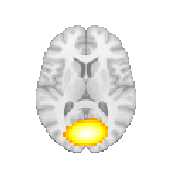


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3686	0.5695	0.1516	0.1868	0.0152	0.0457	0.1354	0.0552	0.1451	0.1116	
Index		16	10	42	2	17	2	17	1	1	47	
1


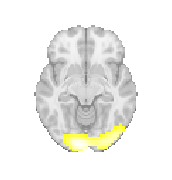


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0562	0.0662	0.3446	0.1242	0.1423	0.1372	0.2043	0.0913	0.0126	0.1220	
Index		2	56	56	50	56	48	47	60	50	21	
1


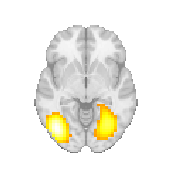


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0573	0.0164	0.0548	0.4250	0.1242	0.0151	0.0495	0.2538	0.0787	0.0312	
Index		7	4	50	52	26	56	50	0	42	42	
1


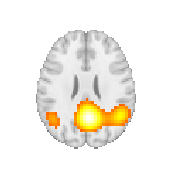


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0983	0.0385	0.0960	0.0075	0.4474	0.0155	0.0252	0.1358	0.0512	0.0345	
Index		42	32	6	19	60	50	19	19	50	50	
1


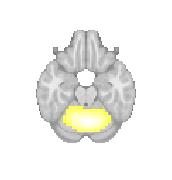


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2314	0.0324	0.1581	0.1551	0.0676	0.3900	0.0107	0.0667	0.0370	0.1566	
Index		60	50	56	19	56	10	10	19	19	19	
1


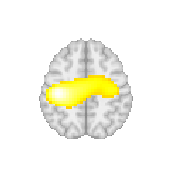


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2932	0.0008	0.1096	0.1102	0.0470	0.0931	0.4284	0.0336	0.0383	0.1766	
Index		50	50	50	50	50	42	21	50	23	2	
1


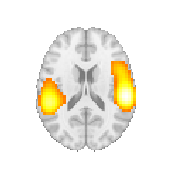


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0375	0.0883	0.1298	0.0450	0.1529	0.0310	0.0425	0.3159	0.0191	0.0966	
Index		2	2	2	60	40	26	10	58	2	10	
1


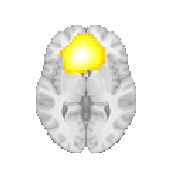


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4287	0.1375	0.2351	0.0561	0.0357	0.0273	0.0725	0.1019	0.2628	0.0558	
Index		5	5	5	32	5	9	49	10	19	50	
1


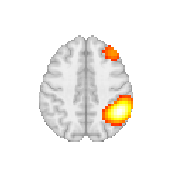


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0247	0.0000	0.0686	0.0484	0.0630	0.1413	0.2416	0.0545	0.0288	0.2597	
Index		7	0	26	16	26	23	21	60	50	2	
1


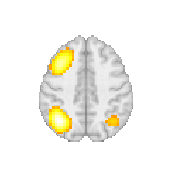

In [10]:
for i in range(10):
    img2d = sta.predict(iou_max.argmax(axis=0)[i])
    img2d[np.sum(img2d > 0, axis=1) < np.sum(img2d < 0, axis=1)] *= -1
    img2d[img2d < 3.6] = 0
    iou = evaluate_iou(img2d, template)
    sta.plot_net(img2d[iou.argmax(axis=0)[i]:iou.argmax(axis=0)[i]+1, :], cut_coords=1, display_mode="z", colorbar=0, threshold=None, annotate=0)


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.6505	0.1756	0.1645	0.0801	0.0316	0.0346	0.0412	0.1759	0.0063	0.1409	
Index		38	32	50	55	45	0	56	63	60	26	
1


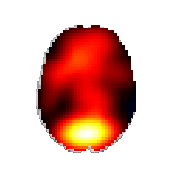


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3686	0.5695	0.1516	0.1868	0.0152	0.0457	0.1354	0.0552	0.1451	0.1116	
Index		16	10	42	2	17	2	17	1	1	47	
1


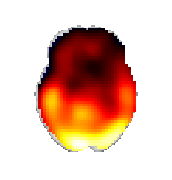


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0562	0.0662	0.3446	0.1242	0.1423	0.1372	0.2043	0.0913	0.0126	0.1220	
Index		2	56	56	50	56	48	47	60	50	21	
1


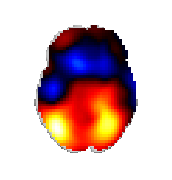


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0573	0.0164	0.0548	0.4250	0.1242	0.0151	0.0495	0.2538	0.0787	0.0312	
Index		7	4	50	52	26	56	50	0	42	42	
1


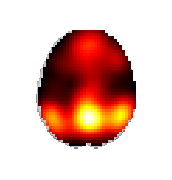


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0983	0.0385	0.0960	0.0075	0.4474	0.0155	0.0252	0.1358	0.0512	0.0345	
Index		42	32	6	19	60	50	19	19	50	50	
1


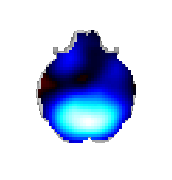


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2314	0.0324	0.1581	0.1551	0.0676	0.3900	0.0107	0.0667	0.0370	0.1566	
Index		60	50	56	19	56	10	10	19	19	19	
1


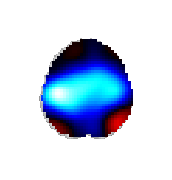


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2932	0.0008	0.1096	0.1102	0.0470	0.0931	0.4284	0.0336	0.0383	0.1766	
Index		50	50	50	50	50	42	21	50	23	2	
1


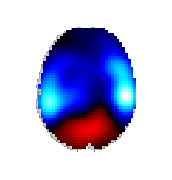


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0375	0.0883	0.1298	0.0450	0.1529	0.0310	0.0425	0.3159	0.0191	0.0966	
Index		2	2	2	60	40	26	10	58	2	10	
1


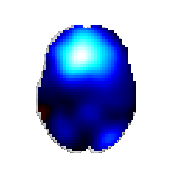


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4287	0.1375	0.2351	0.0561	0.0357	0.0273	0.0725	0.1019	0.2628	0.0558	
Index		5	5	5	32	5	9	49	10	19	50	
1


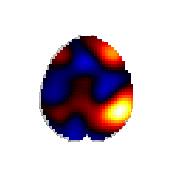


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0247	0.0000	0.0686	0.0484	0.0630	0.1413	0.2416	0.0545	0.0288	0.2597	
Index		7	0	26	16	26	23	21	60	50	2	
1


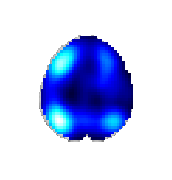

In [11]:
for i in range(10):
    img2d = sta.predict(iou_max.argmax(axis=0)[i])
    img2d[np.sum(img2d > 0, axis=1) < np.sum(img2d < 0, axis=1)] *= -1
    img2d[img2d < 3.6] = 0
    iou = evaluate_iou(img2d, template)
    img2d = sta.predict(iou_max.argmax(axis=0)[i])
    sta.plot_net(img2d[iou.argmax(axis=0)[i]:iou.argmax(axis=0)[i]+1, :], cut_coords=1, display_mode="z", colorbar=0, threshold=None, annotate=0)


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.6505	0.1756	0.1645	0.0801	0.0316	0.0346	0.0412	0.1759	0.0063	0.1409	
Index		38	32	50	55	45	0	56	63	60	26	
1


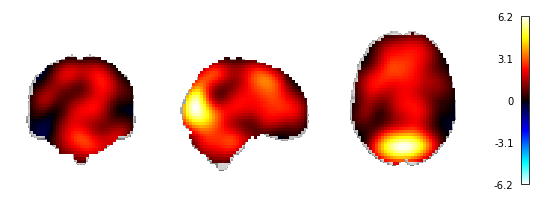


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3686	0.5695	0.1516	0.1868	0.0152	0.0457	0.1354	0.0552	0.1451	0.1116	
Index		16	10	42	2	17	2	17	1	1	47	
1


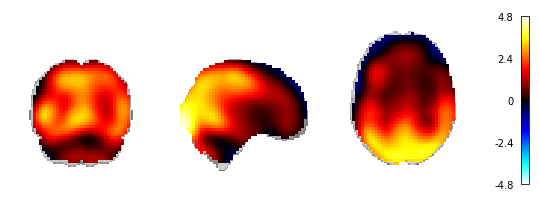


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0562	0.0662	0.3446	0.1242	0.1423	0.1372	0.2043	0.0913	0.0126	0.1220	
Index		2	56	56	50	56	48	47	60	50	21	
1


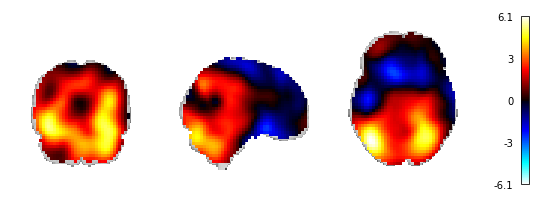


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0573	0.0164	0.0548	0.4250	0.1242	0.0151	0.0495	0.2538	0.0787	0.0312	
Index		7	4	50	52	26	56	50	0	42	42	
1


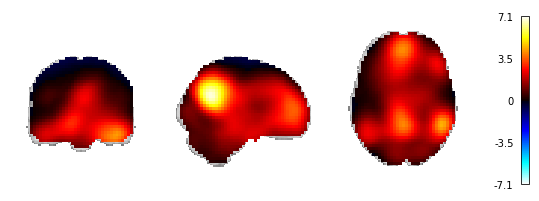


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0983	0.0385	0.0960	0.0075	0.4474	0.0155	0.0252	0.1358	0.0512	0.0345	
Index		42	32	6	19	60	50	19	19	50	50	
1


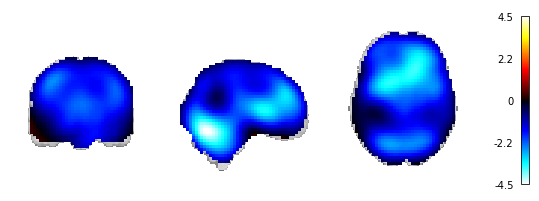


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2314	0.0324	0.1581	0.1551	0.0676	0.3900	0.0107	0.0667	0.0370	0.1566	
Index		60	50	56	19	56	10	10	19	19	19	
1


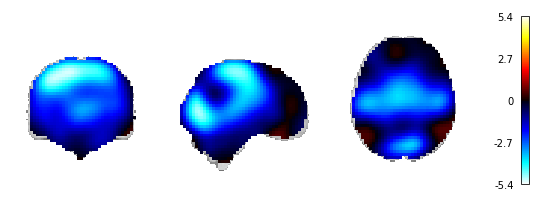


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2932	0.0008	0.1096	0.1102	0.0470	0.0931	0.4284	0.0336	0.0383	0.1766	
Index		50	50	50	50	50	42	21	50	23	2	
1


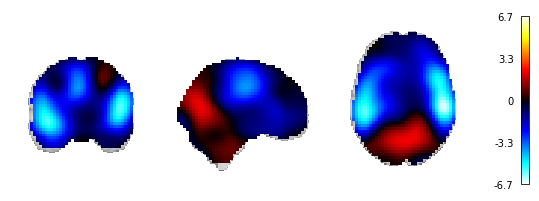


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0375	0.0883	0.1298	0.0450	0.1529	0.0310	0.0425	0.3159	0.0191	0.0966	
Index		2	2	2	60	40	26	10	58	2	10	
1


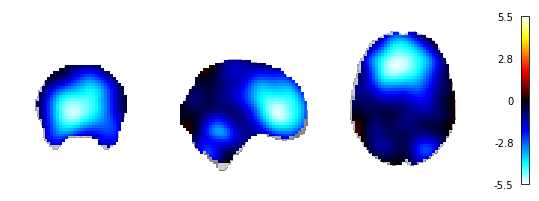


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4287	0.1375	0.2351	0.0561	0.0357	0.0273	0.0725	0.1019	0.2628	0.0558	
Index		5	5	5	32	5	9	49	10	19	50	
1


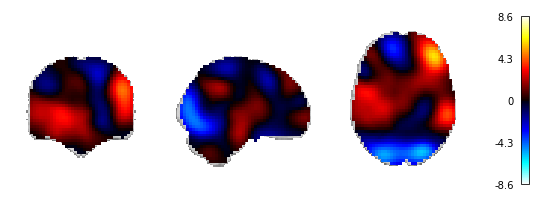


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0247	0.0000	0.0686	0.0484	0.0630	0.1413	0.2416	0.0545	0.0288	0.2597	
Index		7	0	26	16	26	23	21	60	50	2	
1


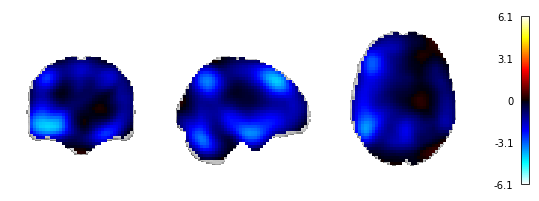

In [17]:
for i in range(10):
    img2d = sta.predict(iou_max.argmax(axis=0)[i])
    img2d[np.sum(img2d > 0, axis=1) < np.sum(img2d < 0, axis=1)] *= -1
    img2d[img2d < 3.6] = 0
    iou = evaluate_iou(img2d, template)
    img2d = sta.predict(iou_max.argmax(axis=0)[i])
    sta.plot_net(img2d[iou.argmax(axis=0)[i]:iou.argmax(axis=0)[i]+1, :], cut_coords=None, display_mode="ortho", colorbar=1, threshold=None, annotate=0)


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.6505	0.1756	0.1645	0.0801	0.0316	0.0346	0.0412	0.1759	0.0063	0.1409	
Index		38	32	50	55	45	0	56	63	60	26	
1


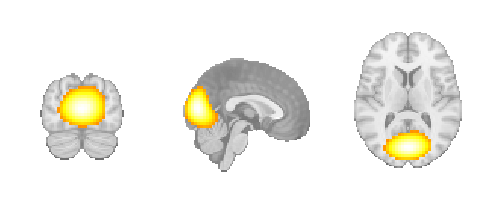


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3686	0.5695	0.1516	0.1868	0.0152	0.0457	0.1354	0.0552	0.1451	0.1116	
Index		16	10	42	2	17	2	17	1	1	47	
1


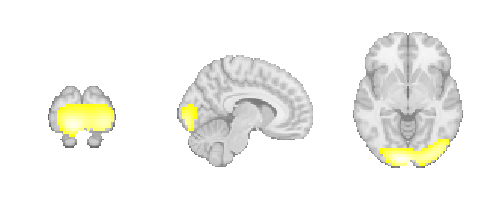


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0562	0.0662	0.3446	0.1242	0.1423	0.1372	0.2043	0.0913	0.0126	0.1220	
Index		2	56	56	50	56	48	47	60	50	21	
1


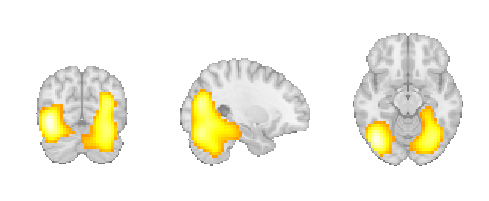


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0573	0.0164	0.0548	0.4250	0.1242	0.0151	0.0495	0.2538	0.0787	0.0312	
Index		7	4	50	52	26	56	50	0	42	42	
1


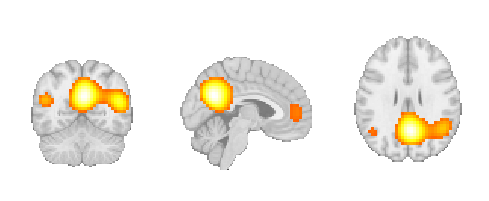


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0983	0.0385	0.0960	0.0075	0.4474	0.0155	0.0252	0.1358	0.0512	0.0345	
Index		42	32	6	19	60	50	19	19	50	50	
1


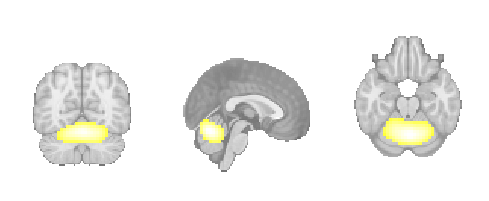


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2314	0.0324	0.1581	0.1551	0.0676	0.3900	0.0107	0.0667	0.0370	0.1566	
Index		60	50	56	19	56	10	10	19	19	19	
1


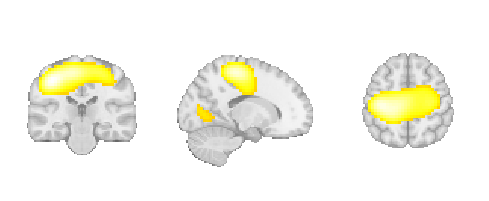


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2932	0.0008	0.1096	0.1102	0.0470	0.0931	0.4284	0.0336	0.0383	0.1766	
Index		50	50	50	50	50	42	21	50	23	2	
1


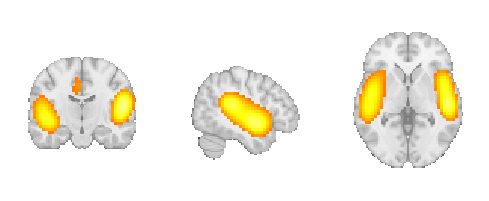


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0375	0.0883	0.1298	0.0450	0.1529	0.0310	0.0425	0.3159	0.0191	0.0966	
Index		2	2	2	60	40	26	10	58	2	10	
1


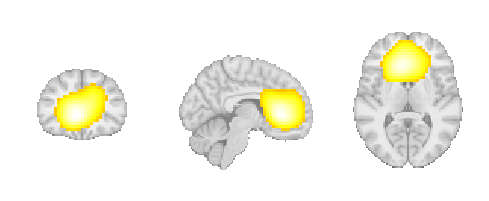


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4287	0.1375	0.2351	0.0561	0.0357	0.0273	0.0725	0.1019	0.2628	0.0558	
Index		5	5	5	32	5	9	49	10	19	50	
1


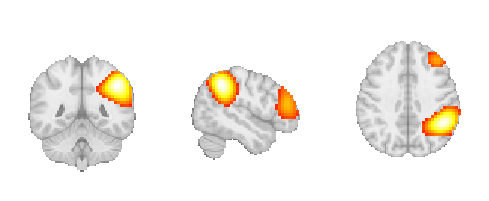


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0247	0.0000	0.0686	0.0484	0.0630	0.1413	0.2416	0.0545	0.0288	0.2597	
Index		7	0	26	16	26	23	21	60	50	2	
1


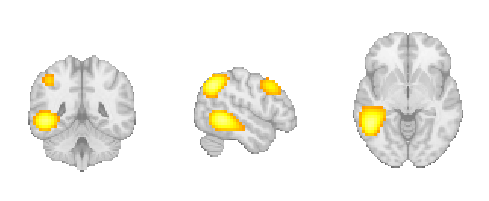

In [10]:
for i in range(10):
    img2d = sta.predict(iou_max.argmax(axis=0)[i])
    img2d[np.sum(img2d > 0, axis=1) < np.sum(img2d < 0, axis=1)] *= -1
    img2d[img2d < 3.6] = 0
    iou = evaluate_iou(img2d, template)
    sta.plot_net(img2d[iou.argmax(axis=0)[i]:iou.argmax(axis=0)[i]+1, :], cut_coords=None, display_mode="ortho", colorbar=0, threshold=None, annotate=0)


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.6505	0.1756	0.1645	0.0801	0.0316	0.0346	0.0412	0.1759	0.0063	0.1409	
Index		38	32	50	55	45	0	56	63	60	26	
1


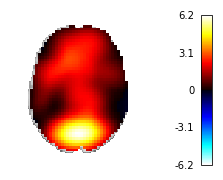


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.3686	0.5695	0.1516	0.1868	0.0152	0.0457	0.1354	0.0552	0.1451	0.1116	
Index		16	10	42	2	17	2	17	1	1	47	
1


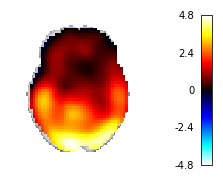


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0562	0.0662	0.3446	0.1242	0.1423	0.1372	0.2043	0.0913	0.0126	0.1220	
Index		2	56	56	50	56	48	47	60	50	21	
1


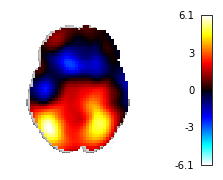


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0573	0.0164	0.0548	0.4250	0.1242	0.0151	0.0495	0.2538	0.0787	0.0312	
Index		7	4	50	52	26	56	50	0	42	42	
1


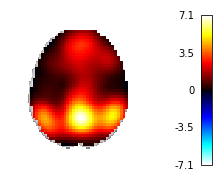


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0983	0.0385	0.0960	0.0075	0.4474	0.0155	0.0252	0.1358	0.0512	0.0345	
Index		42	32	6	19	60	50	19	19	50	50	
1


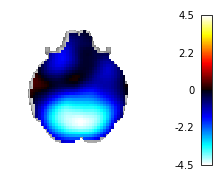


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2314	0.0324	0.1581	0.1551	0.0676	0.3900	0.0107	0.0667	0.0370	0.1566	
Index		60	50	56	19	56	10	10	19	19	19	
1


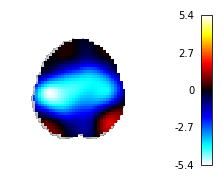


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.2932	0.0008	0.1096	0.1102	0.0470	0.0931	0.4284	0.0336	0.0383	0.1766	
Index		50	50	50	50	50	42	21	50	23	2	
1


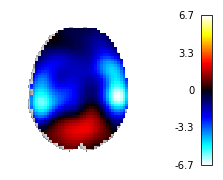


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0375	0.0883	0.1298	0.0450	0.1529	0.0310	0.0425	0.3159	0.0191	0.0966	
Index		2	2	2	60	40	26	10	58	2	10	
1


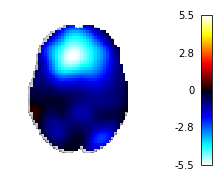


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.4287	0.1375	0.2351	0.0561	0.0357	0.0273	0.0725	0.1019	0.2628	0.0558	
Index		5	5	5	32	5	9	49	10	19	50	
1


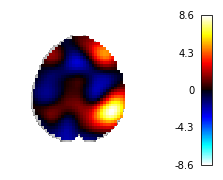


Template	1	2	3	4	5	6	7	8	9	10	
IoU		0.0247	0.0000	0.0686	0.0484	0.0630	0.1413	0.2416	0.0545	0.0288	0.2597	
Index		7	0	26	16	26	23	21	60	50	2	
1


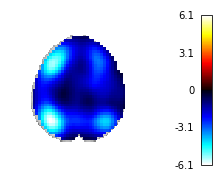

In [12]:
for i in range(10):
    img2d = sta.predict(iou_max.argmax(axis=0)[i])
    img2d[np.sum(img2d > 0, axis=1) < np.sum(img2d < 0, axis=1)] *= -1
    img2d[img2d < 3.6] = 0
    iou = evaluate_iou(img2d, template)
    img2d = sta.predict(iou_max.argmax(axis=0)[i])
    sta.plot_net(img2d[iou.argmax(axis=0)[i]:iou.argmax(axis=0)[i]+1, :], cut_coords=1, display_mode="z", colorbar=1, threshold=None, annotate=0)

1


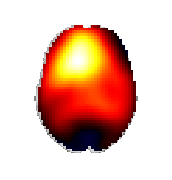

1


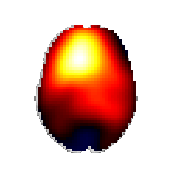

1


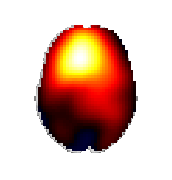

1


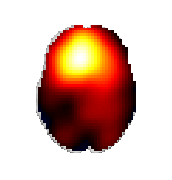

1


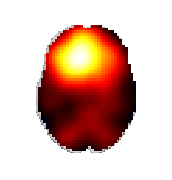

1


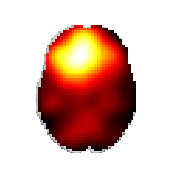

1


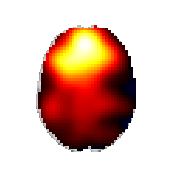

1


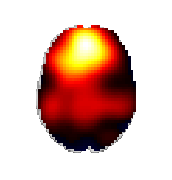

1


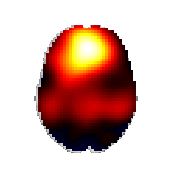

1


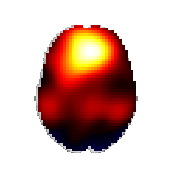

1


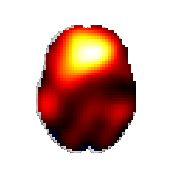

1


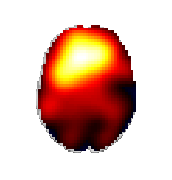

1


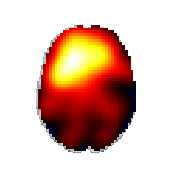

1


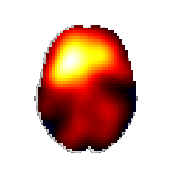

1


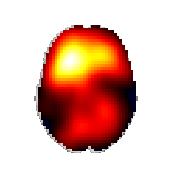

1


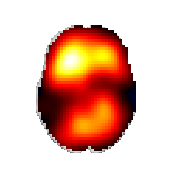

1


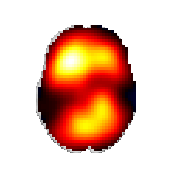

1


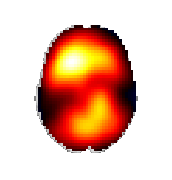

1


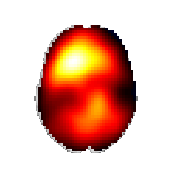

1


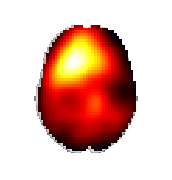

1


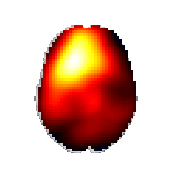

1


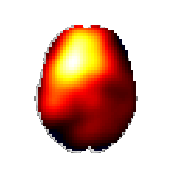

1


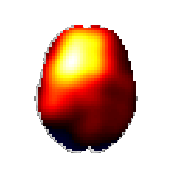

1


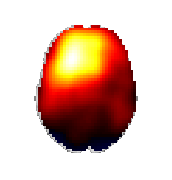

1


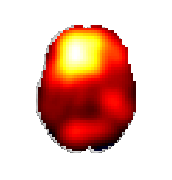

1


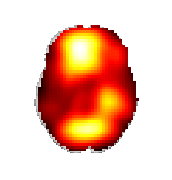

1


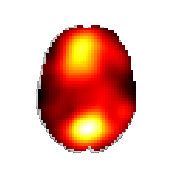

1


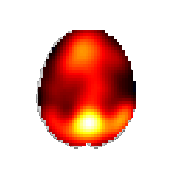

1


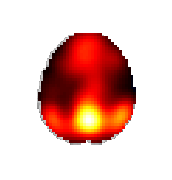

1


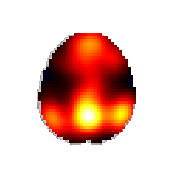

1


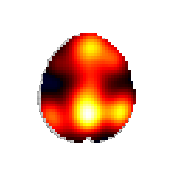

1


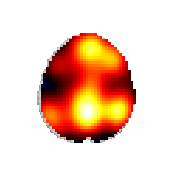

1


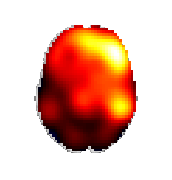

1


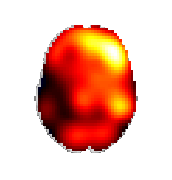

1


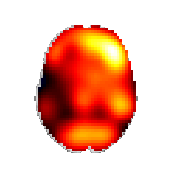

1


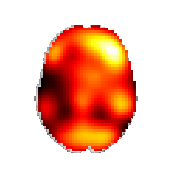

1


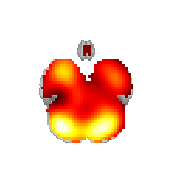

1


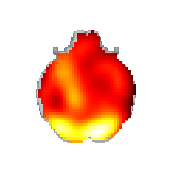

1


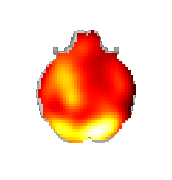

1


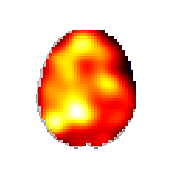

1


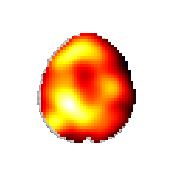

1


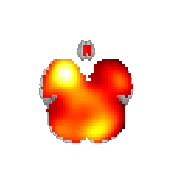

1


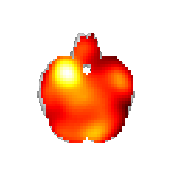

1


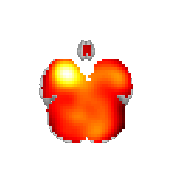

1


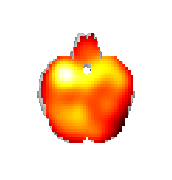

1


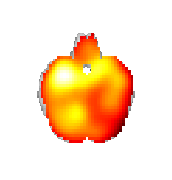

1


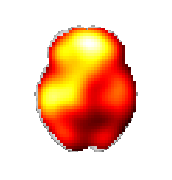

1


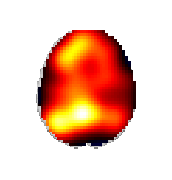

1


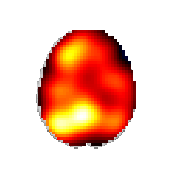

1


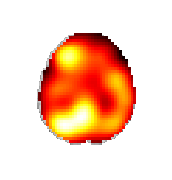

1


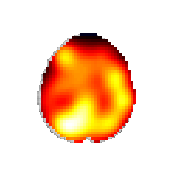

1


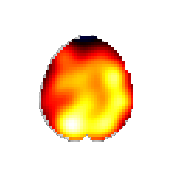

1


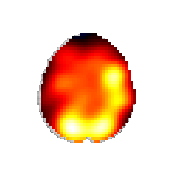

1


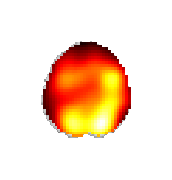

1


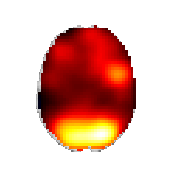

1


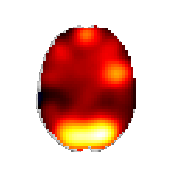

1


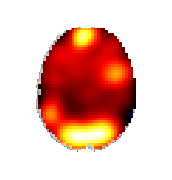

1


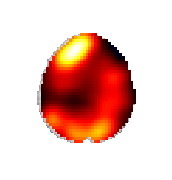

1


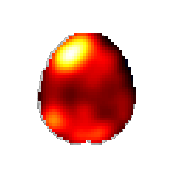

1


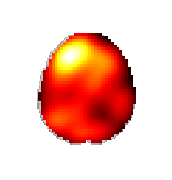

1


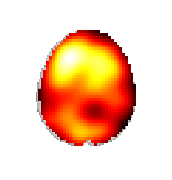

1


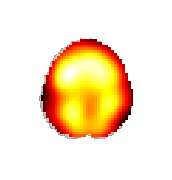

1


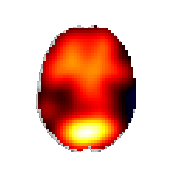

1


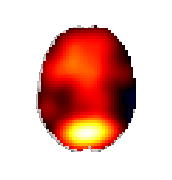

1


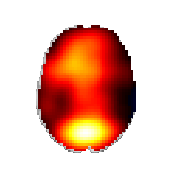

1


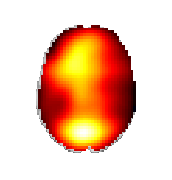

1


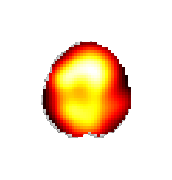

In [14]:
for i in range(0, 200, 3):
    img2d = sta.predict(i)
    sta.plot_net(img2d[27:28, :], cut_coords=1, display_mode="z", colorbar=0, threshold=None, annotate=0)

1


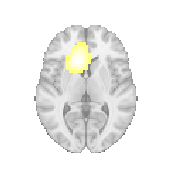

1


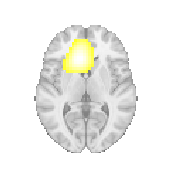

1


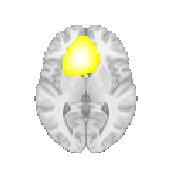

1


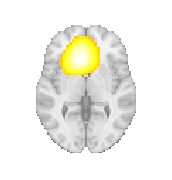

1


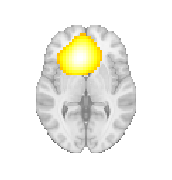

1


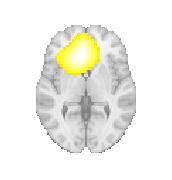

1


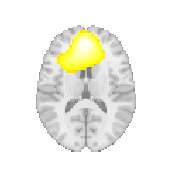

1


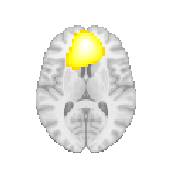

1


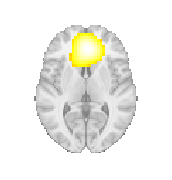

1


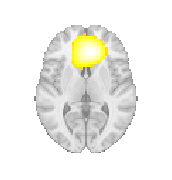

1


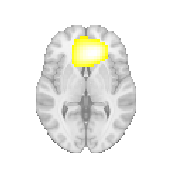

1


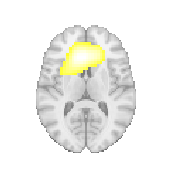

1


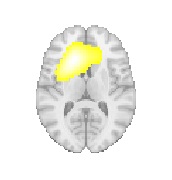

1


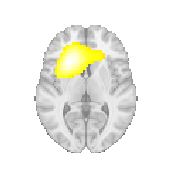

1


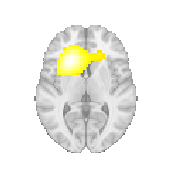

1


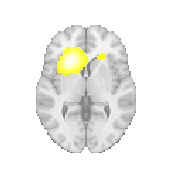

1


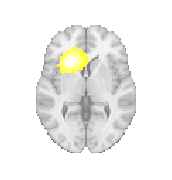

1


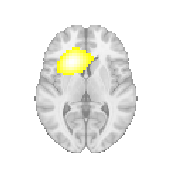

1


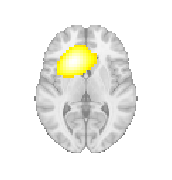

1


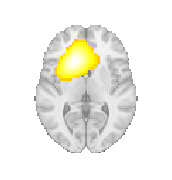

1


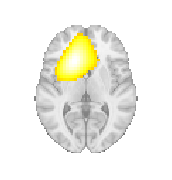

1


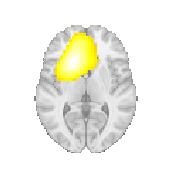

1


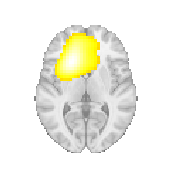

1


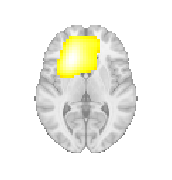

1


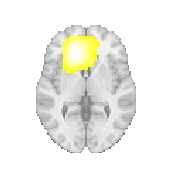

1


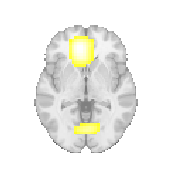

1


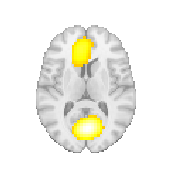

1


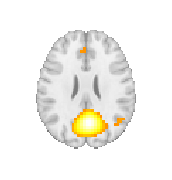

1


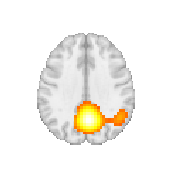

1


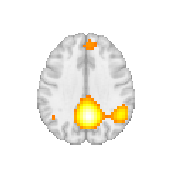

1


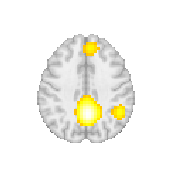

1


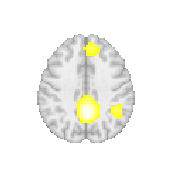

1


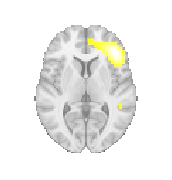

1


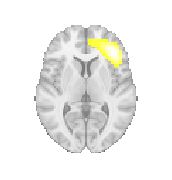

1


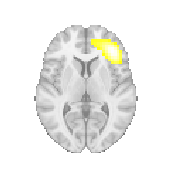

1


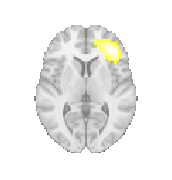

1


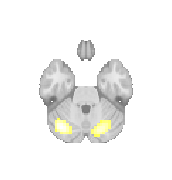

1


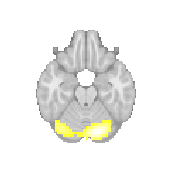

1


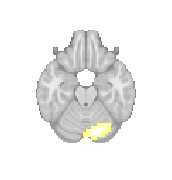

1


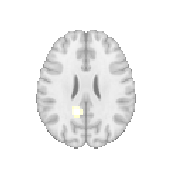

1


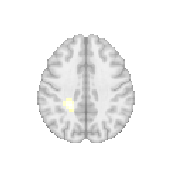

1


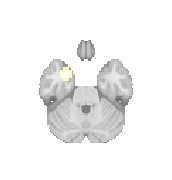

1


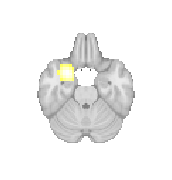

1


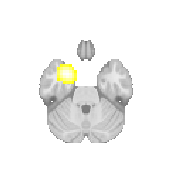

1


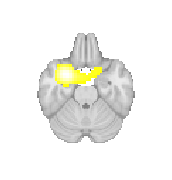

1


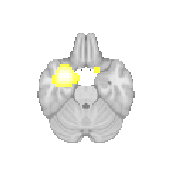

1


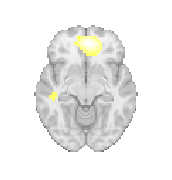

1


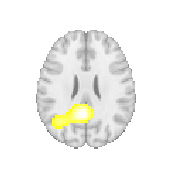

1


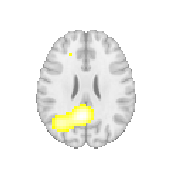

1


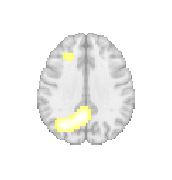

1


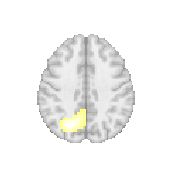

1


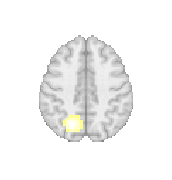

1


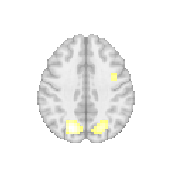

1


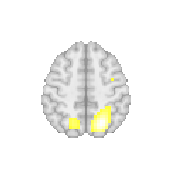

1


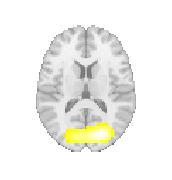

1


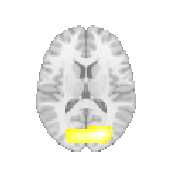

1


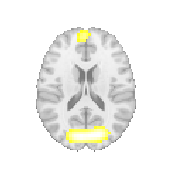

1


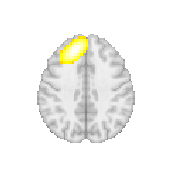

1


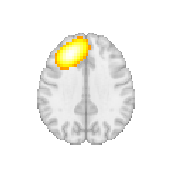

1


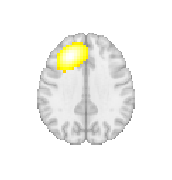

1


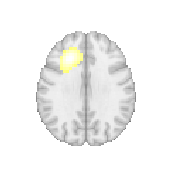

1


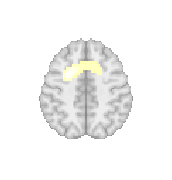

1


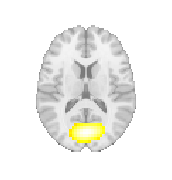

1


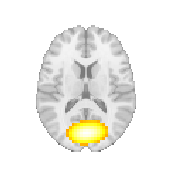

1


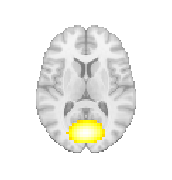

1


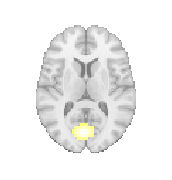

1


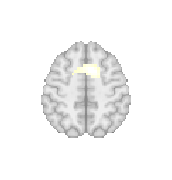

In [7]:
for i in range(0, 200, 3):
    img2d = sta.predict(i)
    sta.plot_net(img2d[27:28, :], cut_coords=1, display_mode="z", colorbar=0, threshold=3.6, annotate=0)

1


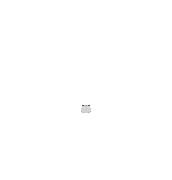

2


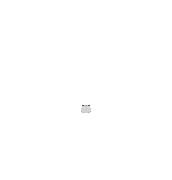

3


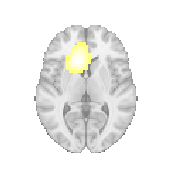

4


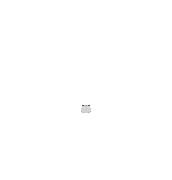

5


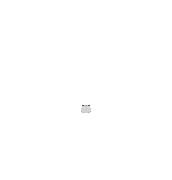

1


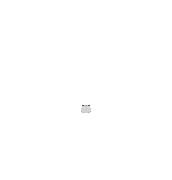

2


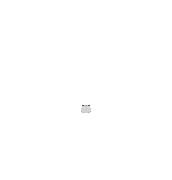

3


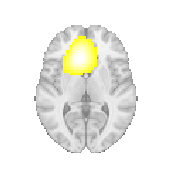

4


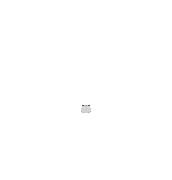

5


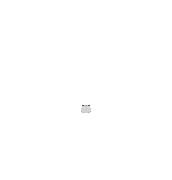

1


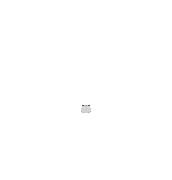

2


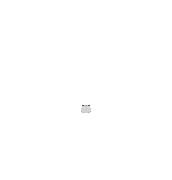

3


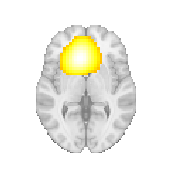

4


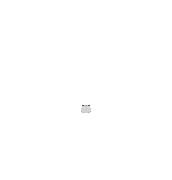

5


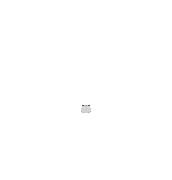

1


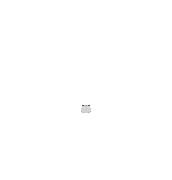

2


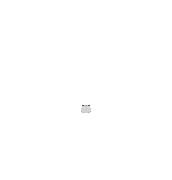

3


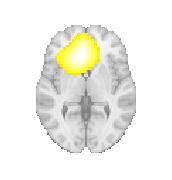

4


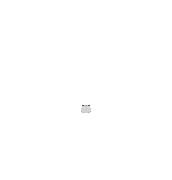

5


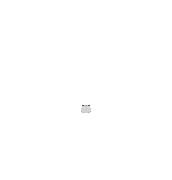

1


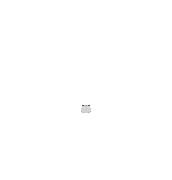

2


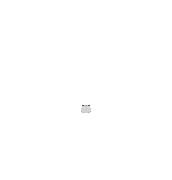

3


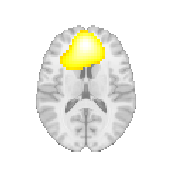

4


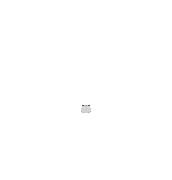

5


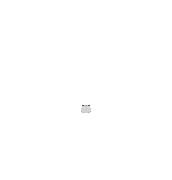

1


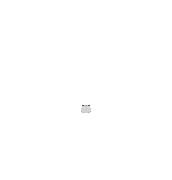

2


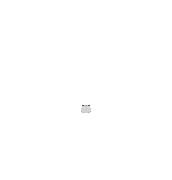

3


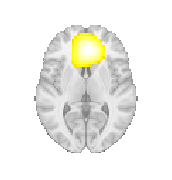

4


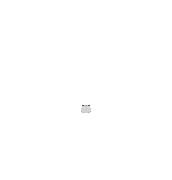

5


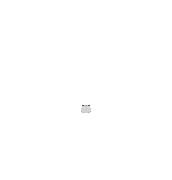

1


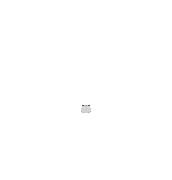

2


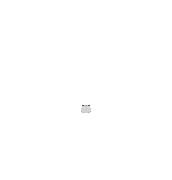

3


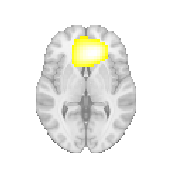

4


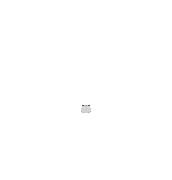

5


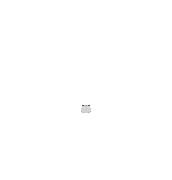

1


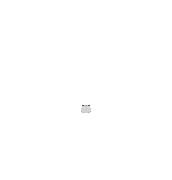

2


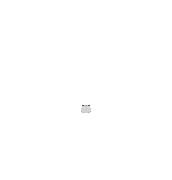

3


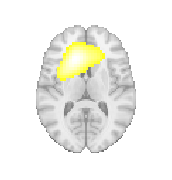

4


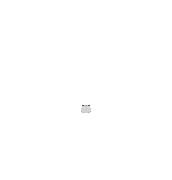

5


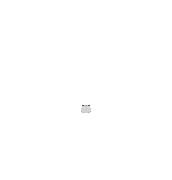

1


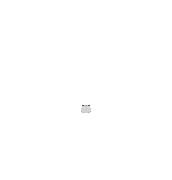

2


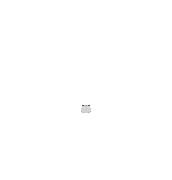

3


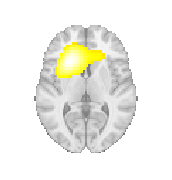

4


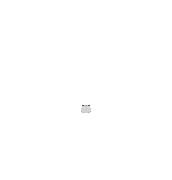

5


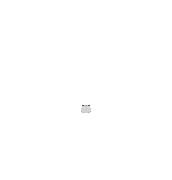

1


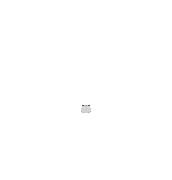

2


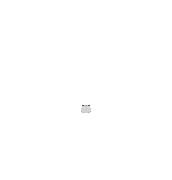

3


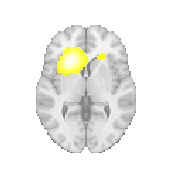

4


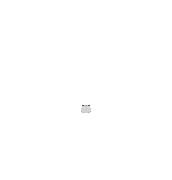

5


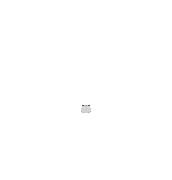

1


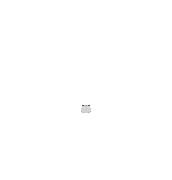

2


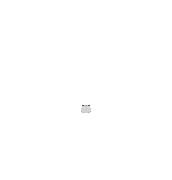

3


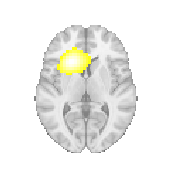

4


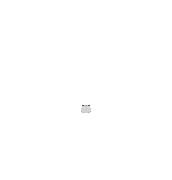

5


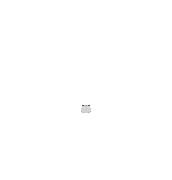

1


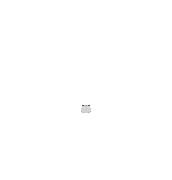

2


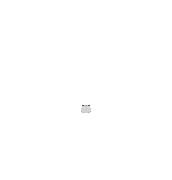

3


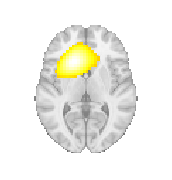

4


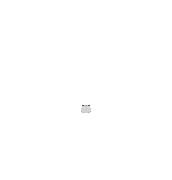

5


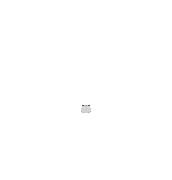

1


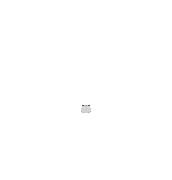

2


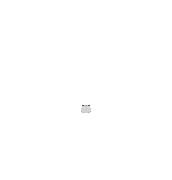

3


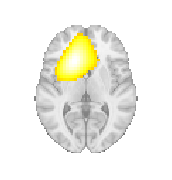

4


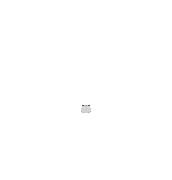

5


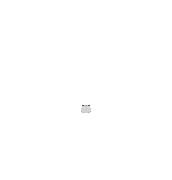

1


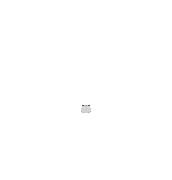

2


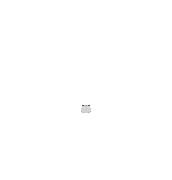

3


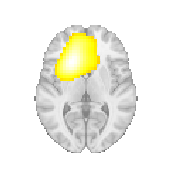

4


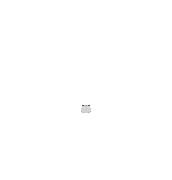

5


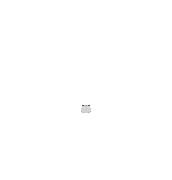

1


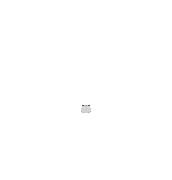

2


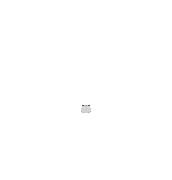

3


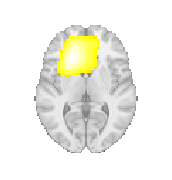

4


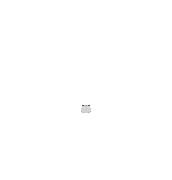

5


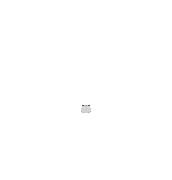

1


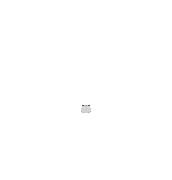

2


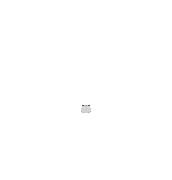

3


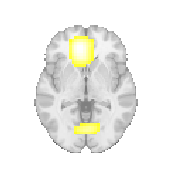

4


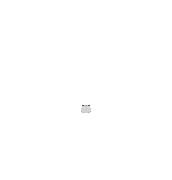

5


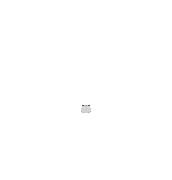

1


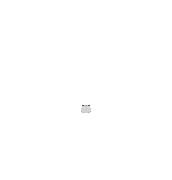

2


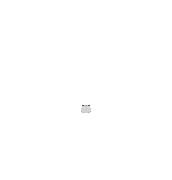

3


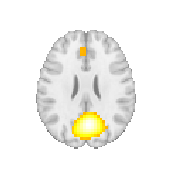

4


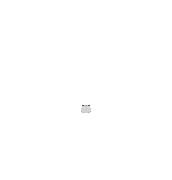

5


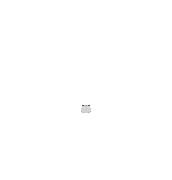

1


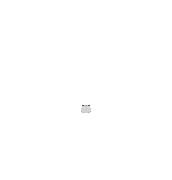

2


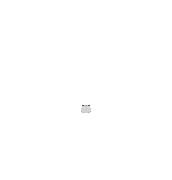

3


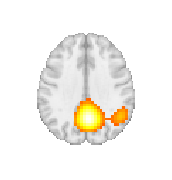

4


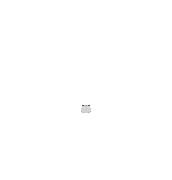

5


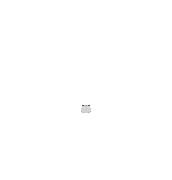

1


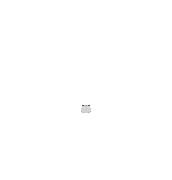

2


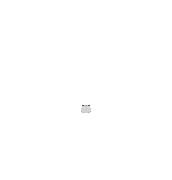

3


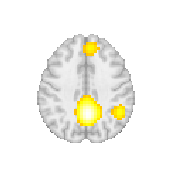

4


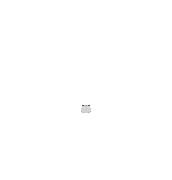

5


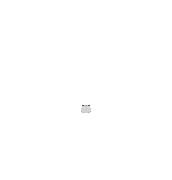

1


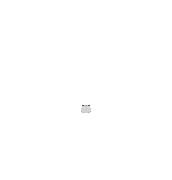

2


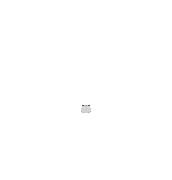

3


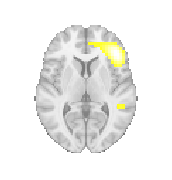

4


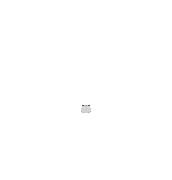

5


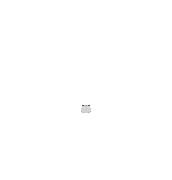

In [11]:
for i in range(0, 100, 5):
    img2d = sta.predict(i)
    sta.plot_net(img2d[25:30, :], cut_coords=1, display_mode="z", colorbar=0, threshold=3.6, annotate=0)

1


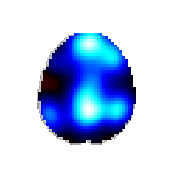

2


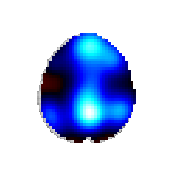

3


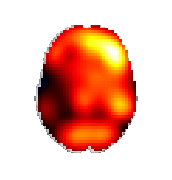

4


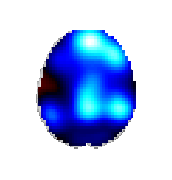

5


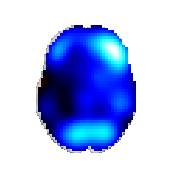

1


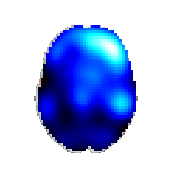

2


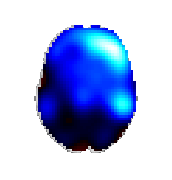

3


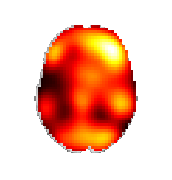

4


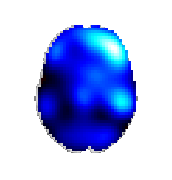

5


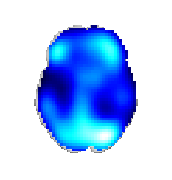

1


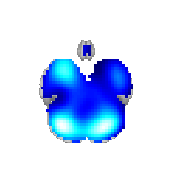

2


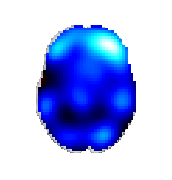

3


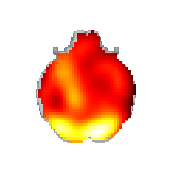

4


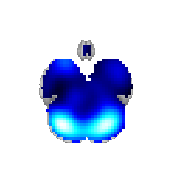

5


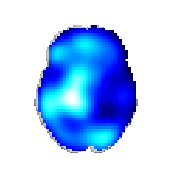

1


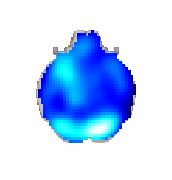

2


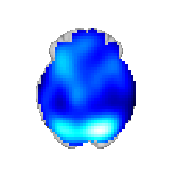

3


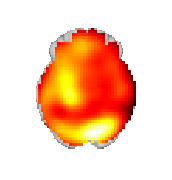

4


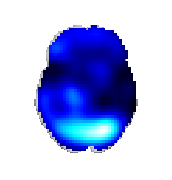

5


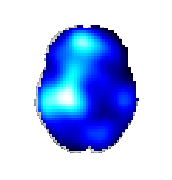

1


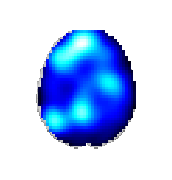

2


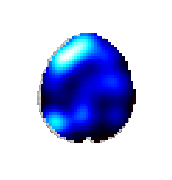

3


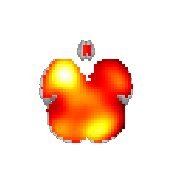

4


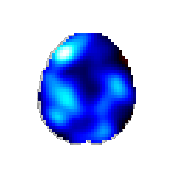

5


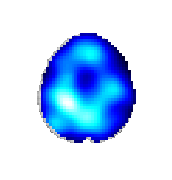

1


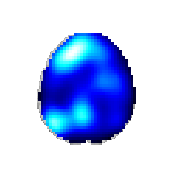

2


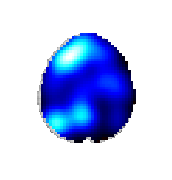

3


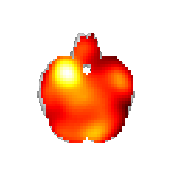

4


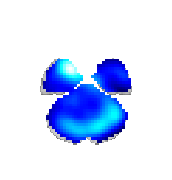

5


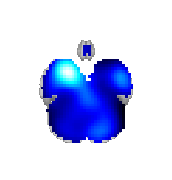

1


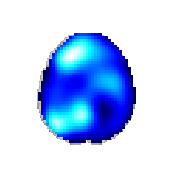

2


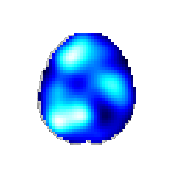

3


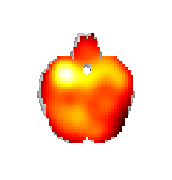

4


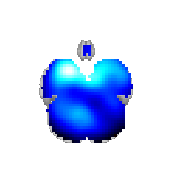

5


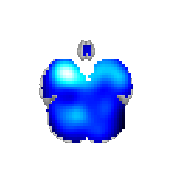

1


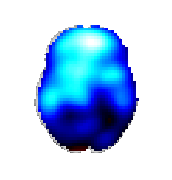

2


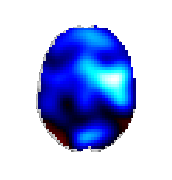

3


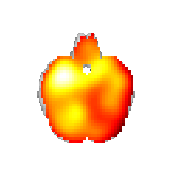

4


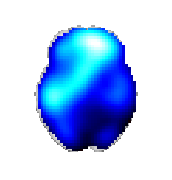

5


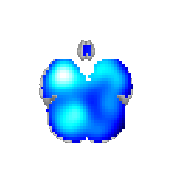

1


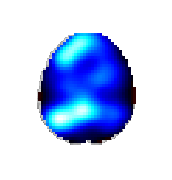

2


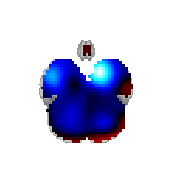

3


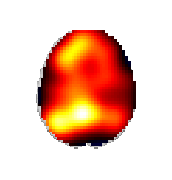

4


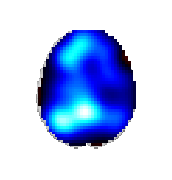

5


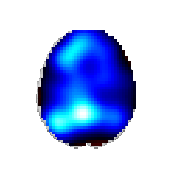

1


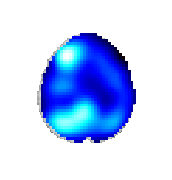

2


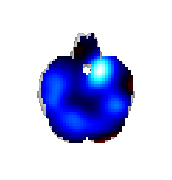

3


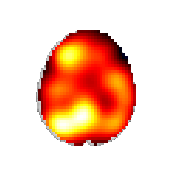

4


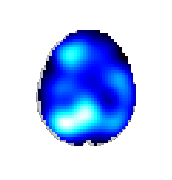

5


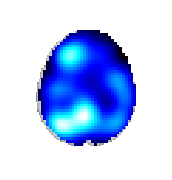

1


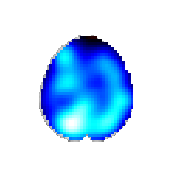

2


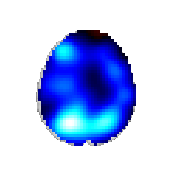

3


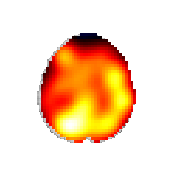

4


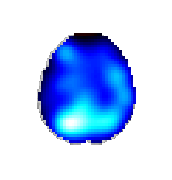

5


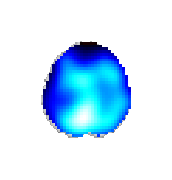

1


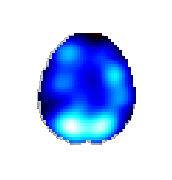

2


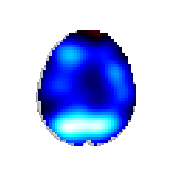

3


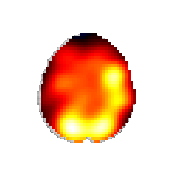

4


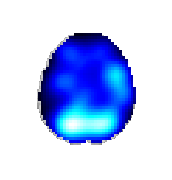

5


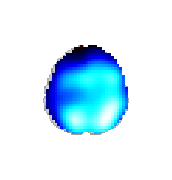

1


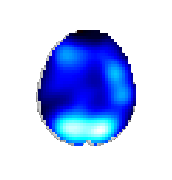

2


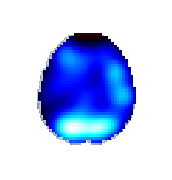

3


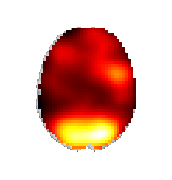

4


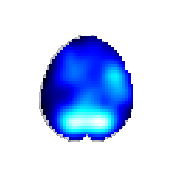

5


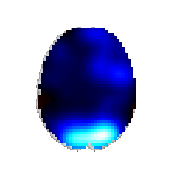

1


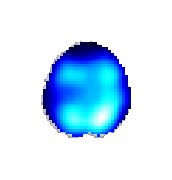

2


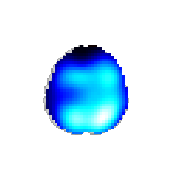

3


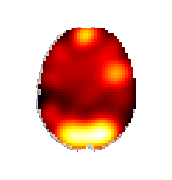

4


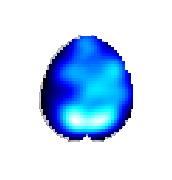

5


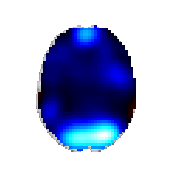

1


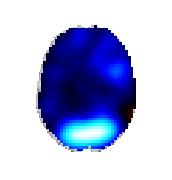

2


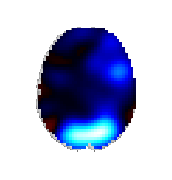

3


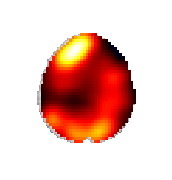

4


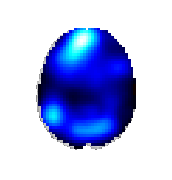

5


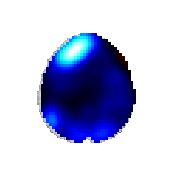

1


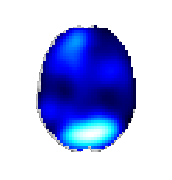

2


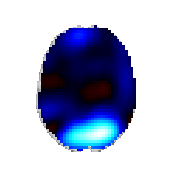

3


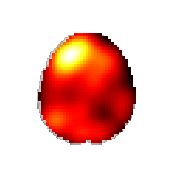

4


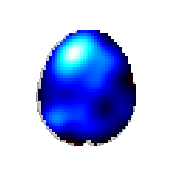

5


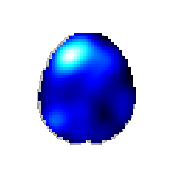

1


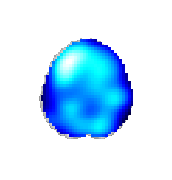

2


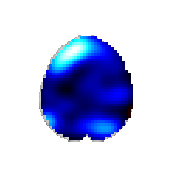

3


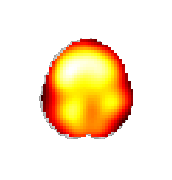

4


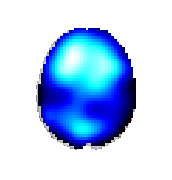

5


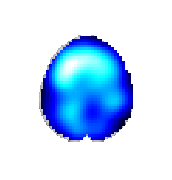

1


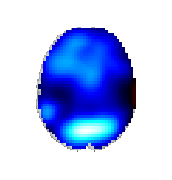

2


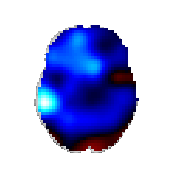

3


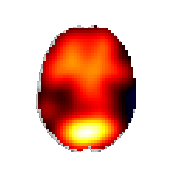

4


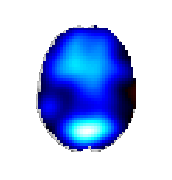

5


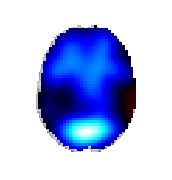

1


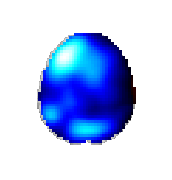

2


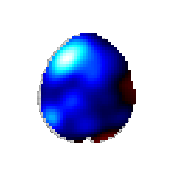

3


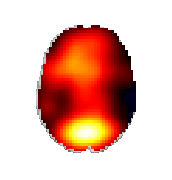

4


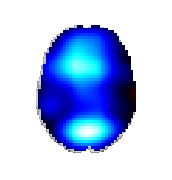

5


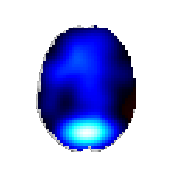

1


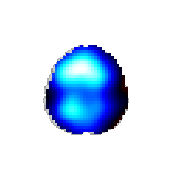

2


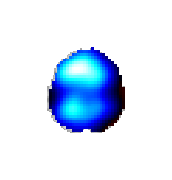

3


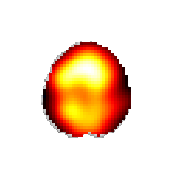

4


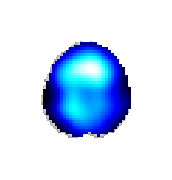

5


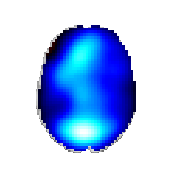

In [18]:
for i in range(101, 200, 5):
    img2d = sta.predict(i)
    sta.plot_net(img2d[25:30, :], cut_coords=1, display_mode="z", colorbar=0, threshold=None, annotate=0)

1


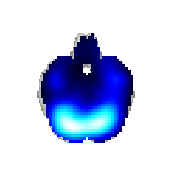

2


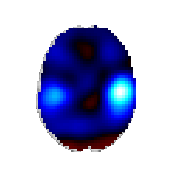

3


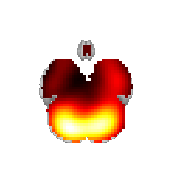

4


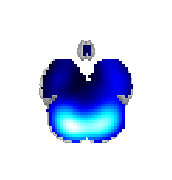

5


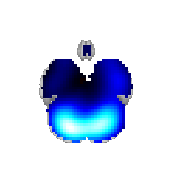

1


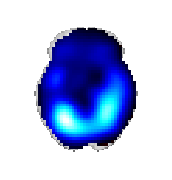

2


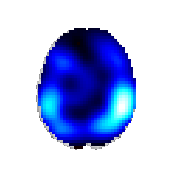

3


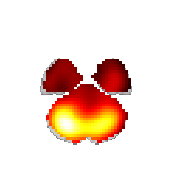

4


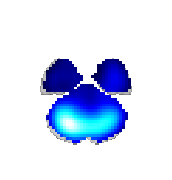

5


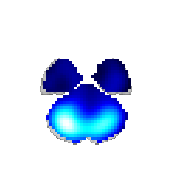

1


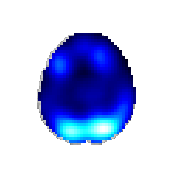

2


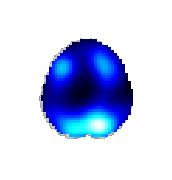

3


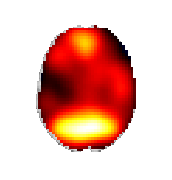

4


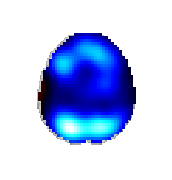

5


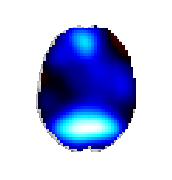

1


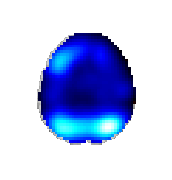

2


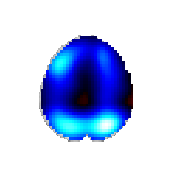

3


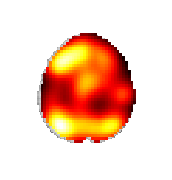

4


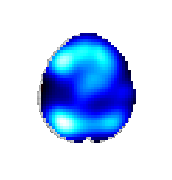

5


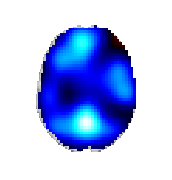

1


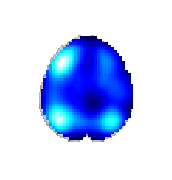

2


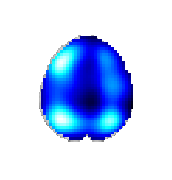

3


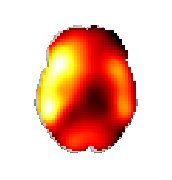

4


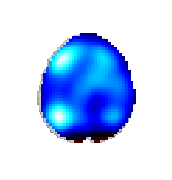

5


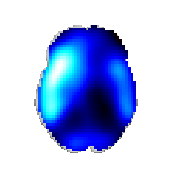

1


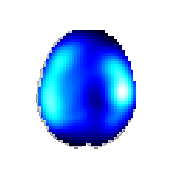

2


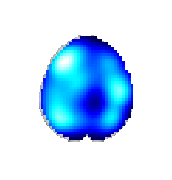

3


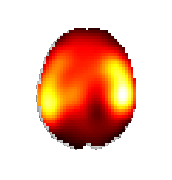

4


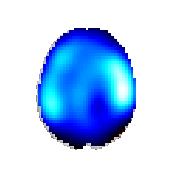

5


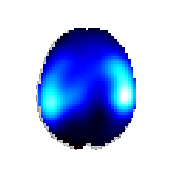

1


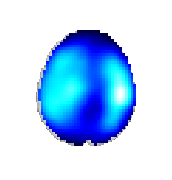

2


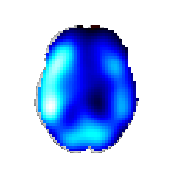

3


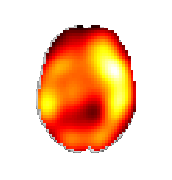

4


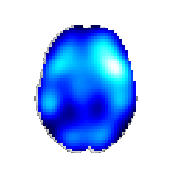

5


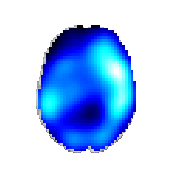

1


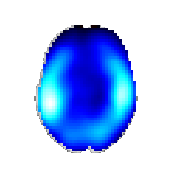

2


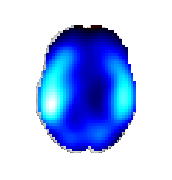

3


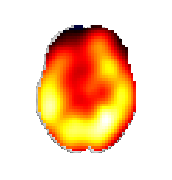

4


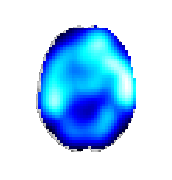

5


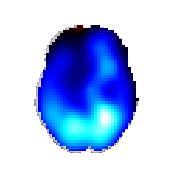

1


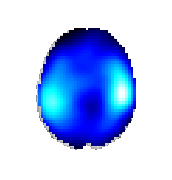

2


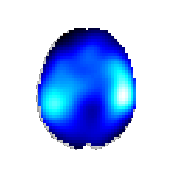

3


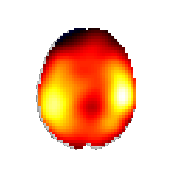

4


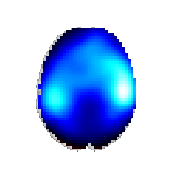

5


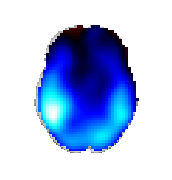

1


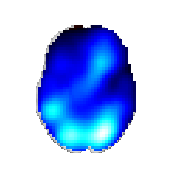

2


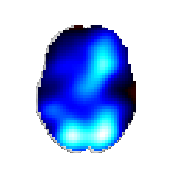

3


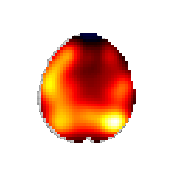

4


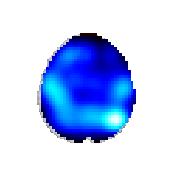

5


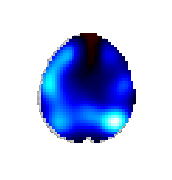

In [19]:
for i in range(601, 650, 5):
    img2d = sta.predict(i)
    sta.plot_net(img2d[25:30, :], cut_coords=1, display_mode="z", colorbar=0, threshold=None, annotate=0)